In [1]:
# Install the OpenAI and LangChain libraries
# - `openai`: Provides access to OpenAI's GPT models for tasks like text generation, embeddings, and completions.
# - `langchain`: A framework for building applications using large language models (LLMs).
#                Includes tools for chaining prompts, memory, and integrations like knowledge graphs.

!pip install -q openai langchain


# Attempt to install the LangChain Community library
# - `langchain-community`: This may refer to a community-supported version or extensions of LangChain.
#   Ensure this package exists and is maintained if errors occur during installation.

!pip install -q langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 1.9 MB/s eta 0:00:00


In [2]:
!pip install networkx rdflib langchain langchain-community SPARQLWrapper  matplotlib #new

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.9/564.9 kB 3.6 MB/s eta 0:00:00



This script initializes the OpenAI API client and defines a function to interact with the GPT model.
The `get_chat_response` function sends a user-provided text input to the GPT model (gpt-3.5-turbo)
and returns the model's response.


In [3]:
import os
from openai import OpenAI

# Set the API key in the environment variable
os.environ["OPENAI_API_KEY"] = "sk-MNL1gYbV6CyXkh2rwPxao_D7n8nSxwW4_0wozr5sUtT3BlbkFJoEpwVXUH_Z3deg71NI-mM8QqSOkOGzQ5WDXmQ8FQEA" # Replace with your actual API key

client = OpenAI()

def get_chat_response(text):
    """
    This function takes a text input and returns the chat completion message.
    """
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": text,
            }
        ],
        model="gpt-3.5-turbo",
    )
    return chat_completion.choices[0].message.content


In [4]:
import networkx as nx  # For creating and analyzing graphs/networks.

import matplotlib.pyplot as plt  # For data visualization and plotting.

import numpy as np  # For numerical operations and array handling.

import random  # For generating random numbers.

from langchain.graphs.networkx_graph import NetworkxEntityGraph, KnowledgeTriple # Represents (subject, predicate, object) triples.

from langchain.llms import OpenAI

from scipy.spatial.distance import cosine  # For cosine similarity/distance between vectors.

from scipy.stats import wasserstein_distance  # For Wasserstein distance (probability distribution comparison).

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.linear_model import LinearRegression, BayesianRidge  # Regression models.

from sklearn.datasets import fetch_20newsgroups  # Fetch the 20 Newsgroups text dataset.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model performance metrics.

import matplotlib.colors as mcolors  # For handling and customizing colors in visualizations.

import sklearn.metrics  # For evaluation metrics like accuracy, precision, recall, etc.

import matplotlib.colors as mcolors  # For handling color schemes in plots

import textwrap  # For wrapping text into fixed-width lines


If you're using OpenAI with a GraphIndexCreator, and it’s unavailable in the new LangChain version, you can adapt the code using NetworkxEntityGraph for creating and querying a graph with an LLM, or we replaced it with a custom CustomGraphIndexCreator that integrates NetworkxEntityGraph.

In [5]:
from langchain.chains import GraphQAChain  # For question answering over knowledge graphs.

# Prompt Engineering
from langchain.prompts import PromptTemplate  # To define templates for LLM prompts.



This script defines a knowledge graph using a set of triples representing entities (nodes)
and their relationships (edges). The triples are categorized into parts based on themes,
such as LLMs in the legal context, RAG integration, collaborations, and key people involved.
The knowledge graph is constructed programmatically by adding these triples into the graph
index, which allows for efficient querying and analysis.



In [6]:
from SPARQLWrapper import SPARQLWrapper, JSON

# Set up the DBpedia SPARQL endpoint
sparql = SPARQLWrapper("https://dbpedia.org/sparql")

# SPARQL Query: Retrieve cybersecurity-related concepts and their triples
query = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?concept ?label ?abstract
WHERE {
  ?concept rdf:type dbo:Software .
  ?concept rdfs:label ?label .
  ?concept dbo:abstract ?abstract .
  FILTER (LANG(?label) = 'en' && LANG(?abstract) = 'en')
  FILTER (CONTAINS(LCASE(?label), "cyber") || CONTAINS(LCASE(?label), "security") || CONTAINS(LCASE(?label), "malware"))
}
LIMIT 10
"""

# Execute the query
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

# Initialize Knowledge Graph (KG) and portion tracking
kg = []
portion_indices = {}
portion_counter = 1  # Start portion numbering
triple_index = 0  # Track overall index

print("\nStructured Knowledge Graph:\n")

for result in results["results"]["bindings"]:
    concept = result["concept"]["value"].split("/")[-1]  # Extracts entity name
    label = result["label"]["value"]
    abstract = result["abstract"]["value"]  # Store full abstract without truncation

    # Store portion index range
    start_index = triple_index
    portion_indices[f"Part {portion_counter}"] = range(start_index, start_index + 3)  # Each part has 3 triples

    # Print structured output
    print(f"\n# Part {portion_counter}")
    print(f"({concept}) → (type) → (Software)")
    print(f"({concept}) → (label) → ({label})")
    print(f"({concept}) → (abstract) →")
    print(abstract)  # Print full abstract with line breaks
    print("-" * 80)

    # Store in KG
    kg.append((concept, "type", "Software"))
    kg.append((concept, "label", label))
    kg.append((concept, "abstract", abstract))  # Store full abstract

    # Increment indices
    triple_index += 3
    portion_counter += 1

# Print portion indices separately
print("\nPortion Indices:\n")
for part, index_range in portion_indices.items():
    print(f"{part}: {index_range}")

# Save KG to a text file
with open("knowledge_graph_output.txt", "w", encoding="utf-8") as f:
    for triple in kg:
        f.write(f"( {triple[0]} , {triple[1]} , {triple[2]})\n\n")  # Ensuring full visibility

print("\nFinal Knowledge Graph saved as 'knowledge_graph_output.txt'.")

# Print the final KG in a readable format
print("\nFinal Knowledge Graph List:\n")
for triple in kg:
  print("(", triple[0],",", triple[1],", ",triple[2], ")")  # Print without truncation


Structured Knowledge Graph:


# Part 1
(Scooby-Doo_and_the_Cyber_Chase_(video_game)) → (type) → (Software)
(Scooby-Doo_and_the_Cyber_Chase_(video_game)) → (label) → (Scooby-Doo and the Cyber Chase (video game))
(Scooby-Doo_and_the_Cyber_Chase_(video_game)) → (abstract) →
Scooby-Doo and the Cyber Chase is a Scooby-Doo video game based on the Warner Brothers film Scooby-Doo and the Cyber Chase. The game was released for the PlayStation and Game Boy Advance in 2001. The PlayStation version became a "Greatest Hits" title in 2003.
--------------------------------------------------------------------------------

# Part 2
(Mirai_(malware)) → (type) → (Software)
(Mirai_(malware)) → (label) → (Mirai (malware))
(Mirai_(malware)) → (abstract) →
Mirai (from the Japanese word for "future", 未来) is a malware that turns networked devices running Linux into remotely controlled bots that can be used as part of a botnet in large-scale network attacks. It primarily targets online consumer devices such as

In [7]:
# Function to wrap text for better display
def wrap_text(text, width=15):
    """
    Wraps the input text to the specified width.

    Parameters:
    - text (str): The text to be wrapped.
    - width (int): The maximum number of characters per line.

    Returns:
    - str: Text wrapped with line breaks.
    """
    return '\n'.join(textwrap.wrap(text, width))


Defines a function to perturb the knowledge graph by selectively removing triples
belonging to specified parts. This allows testing the impact of missing information
on downstream tasks or analysis. The function filters out triples associated with
the indices of the parts to be removed and returns the modified knowledge graph.

In [8]:
def perturb_kg_by_removing_parts(kg, parts_to_remove):
    """
    Perturbs the knowledge graph by removing triples from the specified parts.

    Parameters:
    - kg: The full knowledge graph triples list
    - parts_to_remove: List of part names to remove

    Returns:
    - perturbed_kg: The perturbed KG without the specified parts
    """
    perturbed_kg = []

    # Collect indices of the triples to keep based on parts to remove
    indices_to_remove = set()
    for part in parts_to_remove:
        indices_to_remove.update(part_indices[part])

    # Add triples that are not in the indices to remove
    perturbed_kg = [triple for i, triple in enumerate(kg) if i not in indices_to_remove]

    return perturbed_kg



Defines a function to query a GraphQAChain with a question and temperature setting,
returning the answer and its embedding. The function initializes the chain with a
specified graph and temperature, processes the question, and computes the embedding
for the returned answer, facilitating downstream analysis or comparison.


In [9]:
def get_answer_and_embedding(question: str, temp: float, graph):
    """
    Sends a question and temperature to the GraphQAChain and returns the original answer string
    and its embedding as separate outputs.

    Args:
        question (str): The question to ask the chain.
        temp (float): The temperature setting for the OpenAI model.
        graph: The graph object for the GraphQAChain.

    Returns:
        Tuple[str, list]: The original answer as a string and its embedding as a list.
    """
    # Initialize the GraphQAChain with the specified temperature
    chain = GraphQAChain.from_llm(OpenAI(temperature=temp), graph=graph, verbose=False)

    # Run the question through the chain to get the answer
    original_answer = chain.run(question)
    original_answer_str = str(original_answer)

    # Compute the embedding for the original answer
    original_answer_embedding = get_embedding(original_answer)

    # Return both answer and embedding separately
    return original_answer_str, original_answer_embedding


This function computes the embedding for a given text using a specified model.
It processes the text by removing newline characters and queries the OpenAI
embeddings API to generate a vector representation, useful for similarity
comparisons and downstream tasks.

In [10]:
import random
import json
import unicodedata
import re
embedding_cache = {}
EMBEDDING_MODEL = "text-embedding-3-small"
def normalize_text(text):
    """
    Normalize text by removing excessive spaces, normalizing Unicode characters,
    and converting to lowercase.
    """
    text = text.replace("\n", " ").strip()  # Remove newlines and extra spaces
    text = unicodedata.normalize("NFKC", text)  # Normalize Unicode characters
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with a single space
    text = text.lower()  # Convert to lowercase (optional but recommended)
    return text

def get_embedding(text):
    text = normalize_text(text)
    if text in embedding_cache:
        return embedding_cache[text]  # Return cached embedding
    embedding = client.embeddings.create(input=[text], model=EMBEDDING_MODEL).data[0].embedding
    embedding_cache[text] = embedding  # Store result in cache
    return embedding

This function visualizes the explainability of a knowledge graph by displaying the original graph and an
enhanced graph with nodes and edges colored based on their importance coefficients. It leverages a directed
graph structure, wraps node labels for readability, adjusts node sizes based on connectivity, and applies a
custom colormap to represent the significance of graph components. The visualization is presented in a
two-panel layout, highlighting both the original structure and the explainability features derived from
Simple SMILE GraphRAG analysis. A color bar provides a reference for importance coefficients.


In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def wrap_text(node1, relation, node2, max_words=8):
    """Wrap text if it contains more than `max_words` words and append '_explanation' to abstract nodes."""
    if relation == "abstract":
        words = node2.split()
        return f"{node1}_explanation" if len(words) > max_words else node2
    return node2

def build_graph(kg, coeff, part_indices):
    """Helper function to build graph, assign colors, and sizes."""
    G = nx.DiGraph()
    for node1, relation, node2 in kg:
        wrapped_node2 = wrap_text(node1, relation, node2)
        G.add_edge(node1, wrapped_node2, label=relation)

    pos = nx.spring_layout(G, k=8, iterations=200, seed=0)
    cmap = mcolors.LinearSegmentedColormap.from_list('red_blue', ['blue', '#d3d3d3', 'red'])
    norm = mcolors.Normalize(vmin=-1, vmax=1)
    node_sizes = [1500 + 100 * G.degree(node) for node in G.nodes()]

    node_colors = []
    for node in G.nodes():
        for part_name, indices in part_indices.items():
            part_idx = int(part_name.split()[-1]) - 1
            coeff_value = coeff[part_idx]
            color = cmap(norm(coeff_value))
            if any(i < len(kg) and (node == kg[i][0] or node == wrap_text(kg[i][0], kg[i][1], kg[i][2])) for i in indices):
                node_colors.append(color)
                break
        else:
            node_colors.append('#8da0cb')

    edge_colors = []
    for i, (node1, node2) in enumerate(G.edges()):
        for part_name, indices in part_indices.items():
            part_idx = int(part_name.split()[-1]) - 1
            coeff_value = coeff[part_idx]
            color = cmap(norm(coeff_value))
            if i in indices:
                edge_colors.append(color)
                break
        else:
            edge_colors.append('gray')

    return G, pos, node_sizes, node_colors, edge_colors

def plot_knowledge_graph_explainability(kg, part_indices, coeff):
    """
    Improved visualization of a knowledge graph with explainability features.

    Parameters:
        kg (list): Knowledge graph triplets (node1, relation, node2).
        part_indices (dict): Mapping of part names to indices.
        coeff (list): Importance coefficients for each part.
    """
    G, pos, node_sizes, node_colors, edge_colors = build_graph(kg, coeff, part_indices)

    fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=6, ax=ax)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, ax=ax)
    ax.set_title("Knowledge Graph Explainability", fontsize=14)
    ax.axis('off')

    cmap = mcolors.LinearSegmentedColormap.from_list('red_blue', ['blue', '#d3d3d3', 'red'])
    norm = mcolors.Normalize(vmin=-1, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='horizontal', label='Importance Coefficients', fraction=0.03, pad=0.05)

    plt.savefig('knowledge_graph_explainability.png', bbox_inches='tight')
    plt.show()


In [12]:
# def plot_knowledge_graph_explainability(kg, part_indices, coeff):
#     """
#     Improved visualization of a knowledge graph with explainability features.

#     Parameters:
#         kg (list): Knowledge graph triplets (node1, relation, node2).
#         part_indices (dict): Mapping of part names to indices.
#         coeff (list): Importance coefficients for each part.
#     """
#     # Create directed graph
#     G = nx.DiGraph()
#     for node1, relation, node2 in kg:
#         G.add_edge(node1, node2, label=relation)

#     # Generate positions for the graph with increased spacing
#     pos = nx.spring_layout(G, k=8, iterations=100, seed=0)

#     # Create color map (blue for negative, red for positive)
#     #cmap = mcolors.LinearSegmentedColormap.from_list('red_blue', ['blue', '#F5F5F5', 'red'])
#     cmap = mcolors.LinearSegmentedColormap.from_list('red_blue', ['blue', '#d3d3d3', 'red'])
#     norm = mcolors.Normalize(vmin=-1, vmax=1)

#     # Adjust node size based on degree (number of connections)
#     node_sizes = [1500 + 100 * G.degree(node) for node in G.nodes()]

#     # Assign node and edge colors based on the importance of each part
#     node_colors = []
#     edge_colors = []
#     for node in G.nodes():
#         for part_name, indices in part_indices.items():
#             part_idx = int(part_name.split()[-1]) - 1
#             coeff_value = coeff[part_idx]
#             color = cmap(norm(coeff_value))
#             if node in [kg[i][0] for i in indices] or node in [kg[i][2] for i in indices]:
#                 node_colors.append(color)
#                 break
#         else:
#             node_colors.append('#8da0cb')  # Default color if no match found

#     for i, (node1, node2) in enumerate(G.edges()):
#         for part_name, indices in part_indices.items():
#             part_idx = int(part_name.split()[-1]) - 1
#             coeff_value = coeff[part_idx]
#             color = cmap(norm(coeff_value))
#             if i in indices:
#                 edge_colors.append(color)
#                 break
#         else:
#             edge_colors.append('gray')  # Default color if no match found

#     # Wrap the text labels
#     wrapped_labels = {node: wrap_text(node) for node in G.nodes()}

#     # Create the figure with subplots
#     fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=600, gridspec_kw={'width_ratios': [1, 1.3]})

#     # Left: Original Knowledge Graph
#     nx.draw_networkx_nodes(G, pos, node_color='#d3d3d3', node_size=node_sizes, ax=axs[0])
#     nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.5, ax=axs[0])
#     nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=8, ax=axs[0])
#     edge_labels = nx.get_edge_attributes(G, 'label')
#     wrapped_edge_labels = {edge: wrap_text(label) for edge, label in edge_labels.items()}
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=wrapped_edge_labels, font_size=8, ax=axs[0])
#     axs[0].set_title("Original Knowledge Graph", fontsize=12)
#     axs[0].axis('off')

#     # Right: SMILE Explainability with Node and Edge Colors
#     nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, ax=axs[1])
#     nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.8, ax=axs[1])
#     nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=8, ax=axs[1])
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=wrapped_edge_labels, font_size=8, ax=axs[1])
#     axs[1].set_title("Simple SMILE GraphRAG Explainability", fontsize=12)
#     axs[1].axis('off')

#     # Show the color bar
#     sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#     sm.set_array([])
#     fig.colorbar(sm, ax=axs[1], label='Importance Coefficients')

#     # Save the figure
#     plt.savefig('knowledge_graph_explainability_improved.png', bbox_inches='tight')

#     # Display the plot
#     plt.show()


This function computes and displays fidelity metrics for evaluating regression model performance,
including standard measures like Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE).
It also calculates advanced metrics such as weighted R², weighted adjusted R², mean losses (L1 and L2),
and weighted losses. These metrics provide a comprehensive assessment of model fidelity, considering
weights and coefficients for a nuanced evaluation of the regression results.

In [13]:
def calculate_fidelity_metrics(y_true, y_pred, weights, coeff):
    """
    Calculate and print various fidelity metrics for a regression model.

    Parameters:
        y_true (array-like): True values (ground truth).
        y_pred (array-like): Predicted values.
        weights (array-like): Sample weights.
        coeff (array-like): Coefficients of the regression model (used for adjusted R²).
    """
    # Calculate regression metrics
    mse = mean_squared_error(y_true, y_pred, sample_weight=weights)
    r2 = r2_score(y_true, y_pred, sample_weight=weights)
    mae = mean_absolute_error(y_true, y_pred, sample_weight=weights)

    # Mean loss (Lm)
    mean_loss_f = np.mean(y_true)
    mean_loss_g = np.mean(y_pred)
    mean_loss = abs(mean_loss_f - mean_loss_g)

    # Mean L1 and L2 loss
    mean_l1 = np.mean(np.abs(y_true - y_pred))
    mean_l2 = np.mean((y_true - y_pred) ** 2)

    # Weighted L1 and L2 loss
    n = len(y_true)
    weighted_l1 = np.sum(weights * np.abs(y_true - y_pred)) / n
    weighted_l2 = np.sum(weights * (y_true - y_pred) ** 2) / n

    # Weighted R²
    f_mean = np.average(y_true, weights=weights)
    ss_tot = np.sum(weights * (y_true - f_mean) ** 2)
    ss_res = np.sum(weights * (y_true - y_pred) ** 2)
    weighted_r2 = 1 - ss_res / ss_tot

    # Weighted adjusted R²
    p = len(coeff)
    weighted_adj_r2 = 1 - (1 - weighted_r2) * (n - 1) / (n - p - 1)

    # Print fidelity metrics
    print(100 * '-')
    print('Fidelity:')
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Loss (Lm): {mean_loss}")
    print(f"Mean L1 Loss: {mean_l1}")
    print(f"Mean L2 Loss: {mean_l2}")
    print(f"Weighted L1 Loss: {weighted_l1}")
    print(f"Weighted L2 Loss: {weighted_l2}")
    print(f"Weighted R-squared (R²ω): {weighted_r2}")
    print(f"Weighted Adjusted R-squared (Rˆ²ω): {weighted_adj_r2}")
    print(100 * '-')


This function generates a scatter plot comparing actual (true) values to predicted values,
with an optional weighting mechanism to scale point sizes. It includes a perfect prediction
line (y = x) for reference and displays the R² score as a measure of model performance. The
plot provides an intuitive visual assessment of the alignment between predictions and ground
truth, with customizable point size based on weights for better visualization.

In [14]:
def plot_actual_vs_predicted(y_true, y_pred, weights=None):
    """
    Plot actual vs. predicted values with an optional weight normalization for point sizes.
    Displays the R² score and a perfect prediction line (y = x).

    Parameters:
        y_true (array-like): True values (ground truth).
        y_pred (array-like): Predicted values.
        weights (array-like, optional): Weights for scaling point sizes in the scatter plot.
    """
    # Calculate the R² score
    r2 = r2_score(y_true, y_pred, sample_weight=weights)

    # Normalize weights for better visualization
    if weights is not None:
        normalized_weights = np.array(weights) / np.max(weights) * 100  # Scale weights to a reasonable range
    else:
        normalized_weights = 50

    # Plotting
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, s=normalized_weights, label='Data points', alpha=0.6)  # Use weights for point sizes

    # Determine the range for the perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())

    # Plotting the Perfect Prediction Line (y = x)
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction Line')

    # Set the plot limits to better frame the data
    ax.set_xlim([min_val, max_val])
    ax.set_ylim([min_val, max_val])

    # Labeling the axes
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Title with R² score rounded to two decimal places
    ax.set_title(f'Actual vs. Predicted Values\nR²: {r2:.2f}')

    # Show legend
    ax.legend()

    # Show plot
    plt.show()


Defines the question to query the GraphQAChain or knowledge retrieval system.
Here, the question "What is RAG?" seeks information about Retrieval-Augmented Generation,
a framework that integrates external knowledge bases to improve the accuracy and reliability
of AI-generated responses.

In [15]:
part_indices ={
"Part 1": range(0, 3),
"Part 2": range(3, 6),
"Part 3": range(6, 9),
"Part 4": range(9, 12),
"Part 5": range(12, 15),
"Part 6": range(15, 18),
"Part 7": range(18, 21),
"Part 8": range(21, 24),
"Part 9": range(24, 27),
"Part 10": range(27, 30)
}
part_names = list(part_indices.keys())

# Instantiate the graph
graph = NetworkxEntityGraph()

# Build the graph from the knowledge triples
for (node1, relation, node2) in kg:
    graph.add_triple(KnowledgeTriple(node1, relation, node2))

In [16]:
question = "what is Network_Security_Services?"
#Portion 3

This snippet sets the temperature parameter to 0 for deterministic response generation and
queries the GraphQAChain with the question, "What is RAG?". The function `get_answer_and_embedding`
returns the original answer as a string along with its embedding. The answer is then printed for review.

In [17]:
temp = 0
original_answer_str, original_answer_embedding = get_answer_and_embedding(question, temp, graph)
print(original_answer_str)
# Compute the embedding for the original answer

<ipython-input-9-f8266995fb14>:15: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  chain = GraphQAChain.from_llm(OpenAI(temperature=temp), graph=graph, verbose=False)
<ipython-input-9-f8266995fb14>:18: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  original_answer = chain.run(question)


 Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.


In [18]:
# Define the original vector (all parts present)
original = np.array([1, 1, 1, 1, 1,1, 1, 1, 1, 1])
original = original.reshape(1, -1)  # Shape becomes (1,10)

This code defines a custom function, timed_and_log_detailed, to measure the execution time of a code block, including CPU usage (user, system, and total CPU times) and wall clock time. It uses the psutil library for CPU time tracking and the time module for wall time measurement. The timing results are stored in a global runtimes list as dictionaries for later analysis and are also printed in a detailed format after execution. This is useful for profiling the performance of specific code segments.

In [19]:
import time
import psutil
from IPython.core.magic import register_cell_magic

# Initialize a list to store runtimes
runtimes = []

@register_cell_magic
def timed_and_log_detailed(line, cell):
    """
    Custom magic to measure CPU times and wall time for a cell
    and log the results in a global runtimes list.
    """
    global runtimes

    # Record the start time and CPU usage
    start_wall_time = time.time()
    start_cpu_time = psutil.cpu_times()

    # Execute the cell
    exec(cell, globals())

    # Record the end time and CPU usage
    end_wall_time = time.time()
    end_cpu_time = psutil.cpu_times()

    # Calculate times
    wall_time = end_wall_time - start_wall_time
    user_time = end_cpu_time.user - start_cpu_time.user
    sys_time = end_cpu_time.system - start_cpu_time.system
    total_cpu_time = user_time + sys_time

    # Log the times as a dictionary
    runtimes.append({
        "user_time": user_time,
        "sys_time": sys_time,
        "total_cpu_time": total_cpu_time,
        "wall_time": wall_time
    })

    # Print detailed runtime
    print(f"CPU times: user {user_time:.2f} s, sys {sys_time:.2f} s, total {total_cpu_time:.2f} s")
    print(f"Wall time: {wall_time:.2f} s")

# Exploring Explainability: Fidelity Metrics Comparison for Text vs. Text and Graph vs. Graph Representations Using Cosine, wasserstein_distance, and Combined Approaches

This script evaluates the robustness of a knowledge graph system by perturbing the graph and measuring the
impact on the generated responses. It iteratively removes random parts of the graph, calculates similarity
metrics (Wasserstein distance and cosine similarity) between the original and perturbed response embeddings,
and stores the perturbation details for analysis. Additionally, it computes cosine distances and kernel-based
weights for further analysis of the perturbations' impact.

Key Steps:
1. Generate perturbed versions of the knowledge graph by randomly removing parts.
2. Create embeddings for responses from the perturbed graphs.
3. Calculate similarity metrics between original and perturbed responses.
4. Compute kernel-based weights using cosine distances for downstream tasks.

# BayLIME: Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine
Cosine Similarity: Measuring Alignment and Fidelity Between Textual Representations
Wasserstein Distance: Evaluating Semantic Shifts Between Textual Representations


This script computes a combined similarity metric by scaling inverse Wasserstein distances
(to normalize between 0 and 1) and adding them to cosine similarities. The result, stored
in `Similarities_`, provides a composite measure of fidelity, highlighting the alignment
between perturbed and original responses in the knowledge graph system.

Iteration 1
Parts removed: ['Part 10', 'Part 9', 'Part 6', 'Part 5']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Wasserstein Distance with original answer: 0.0
Cosine Similarity with original answer: 1.0

Iteration 2
Parts removed: ['Part 8', 'Part 7', 'Part 5', 'Part 3']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network Security Services (NSS) is a set of open source libraries designed to support cross-platform development of security-enabled client and 

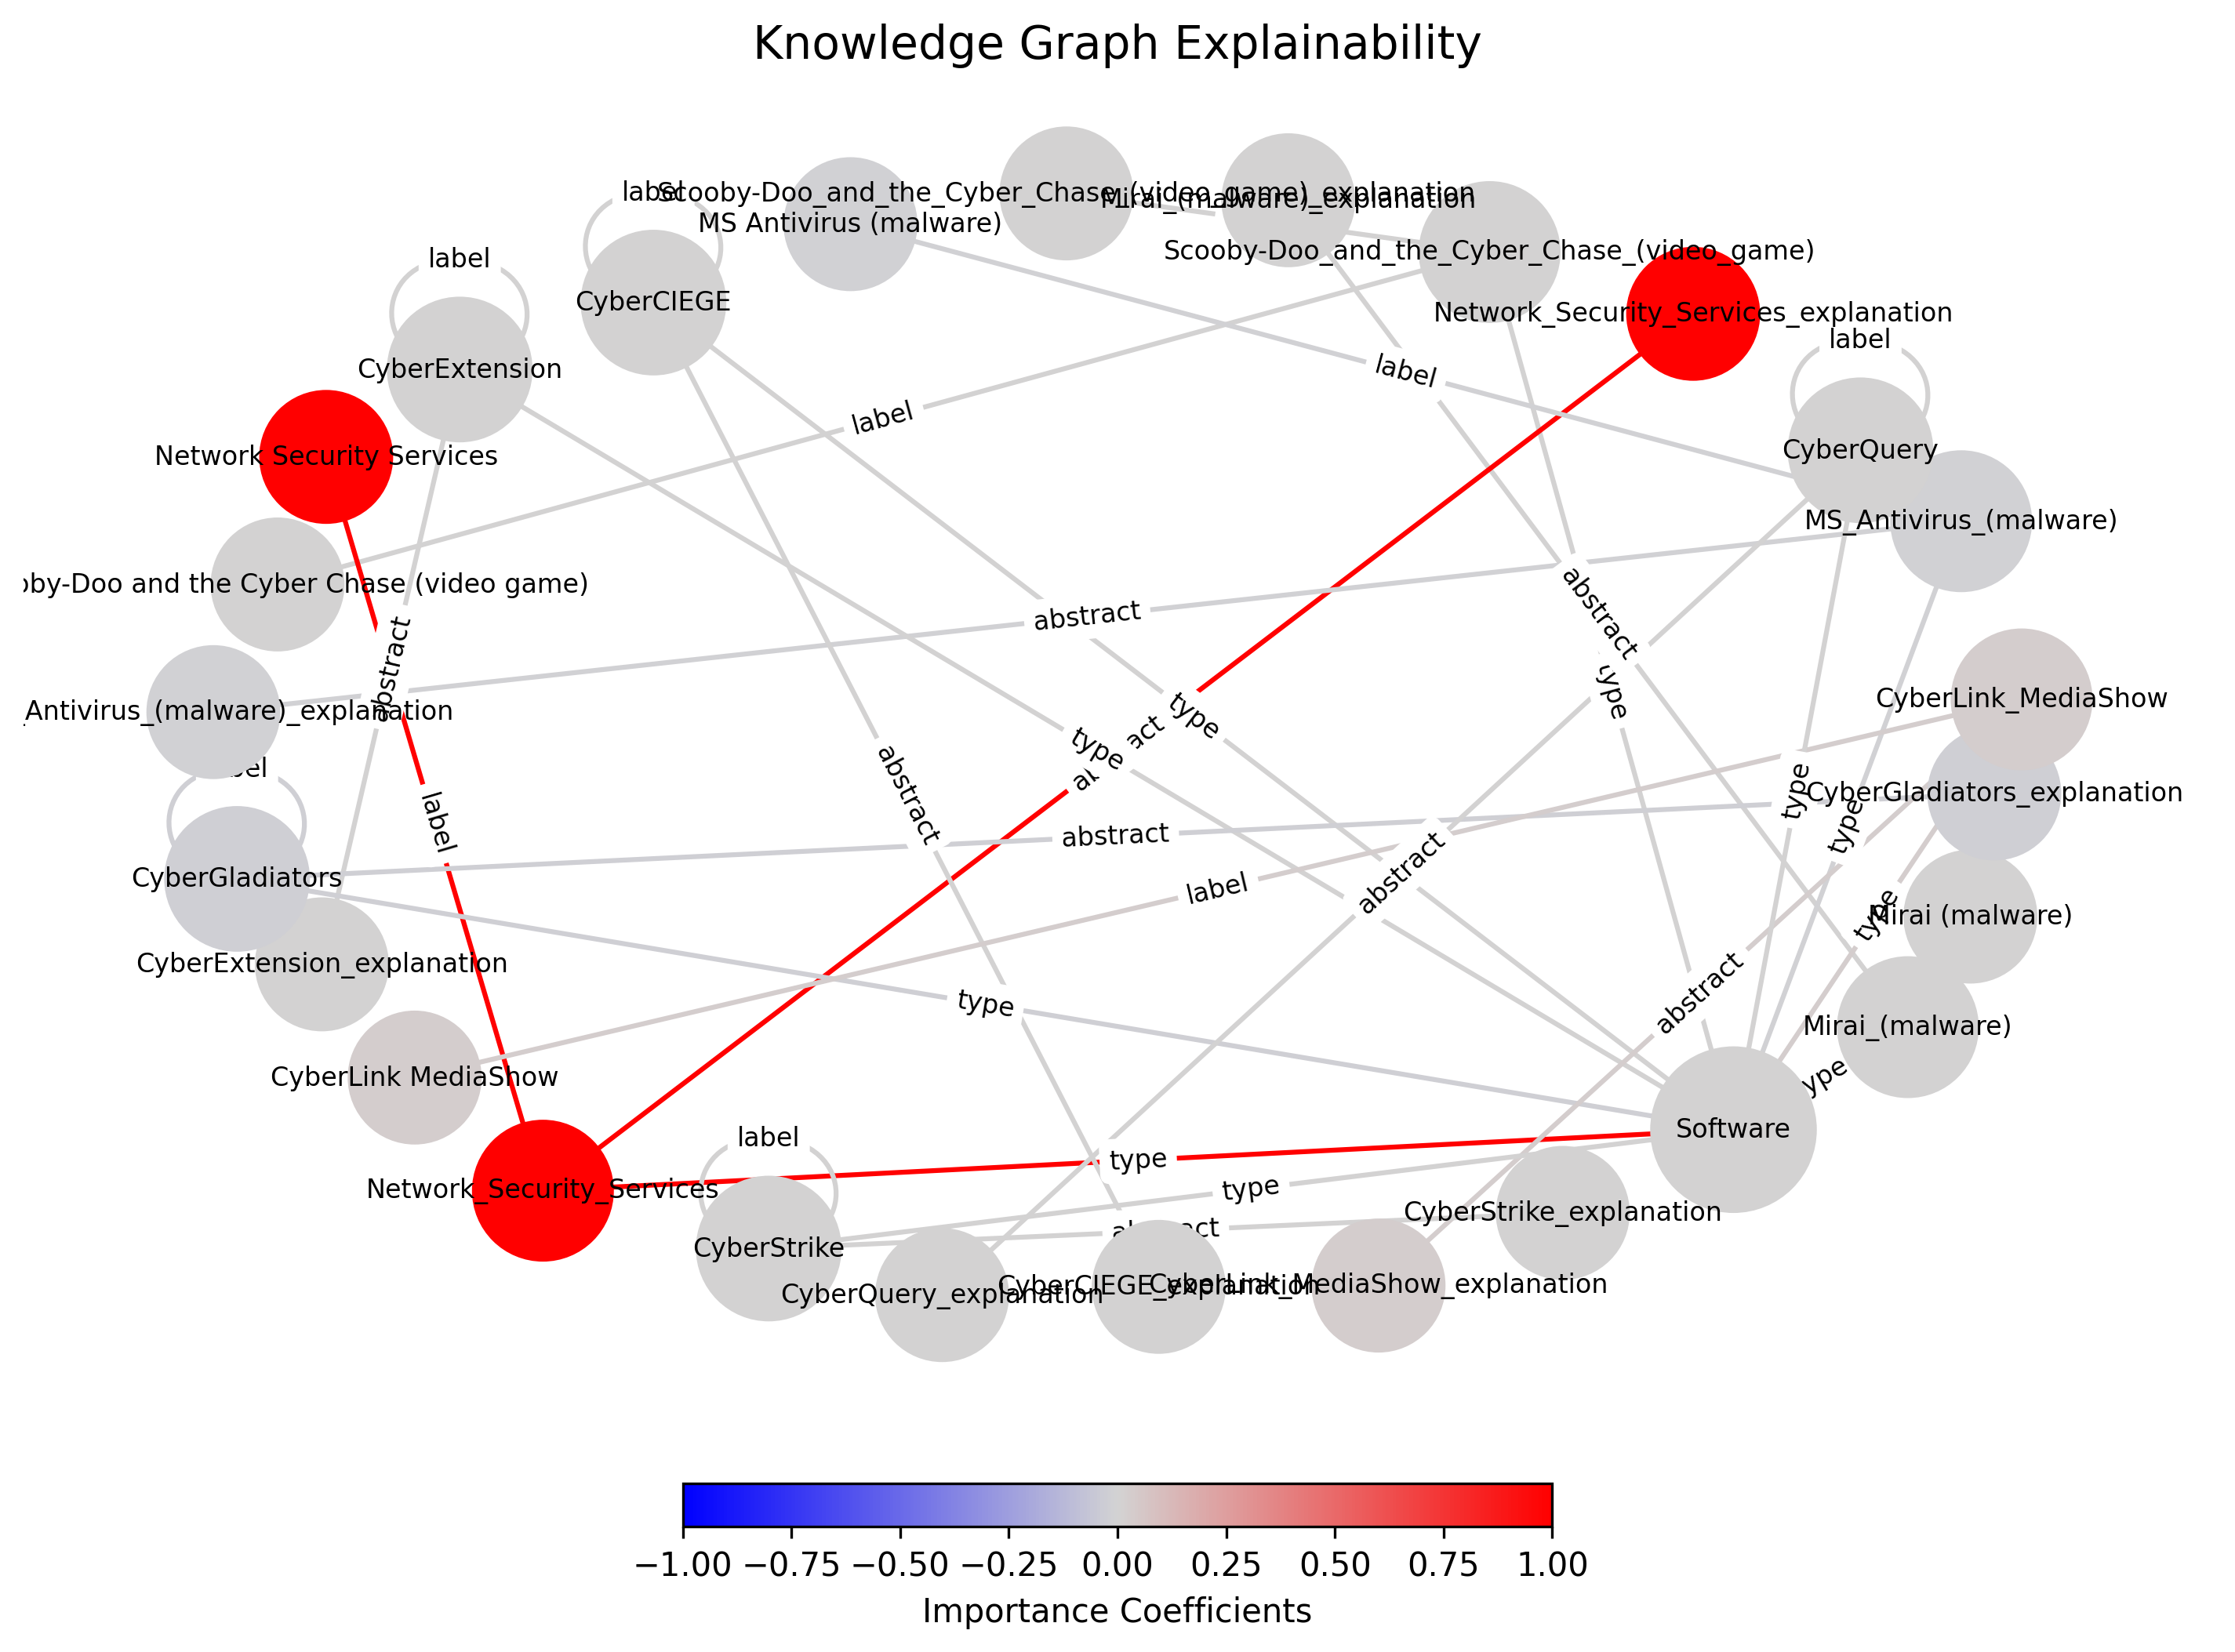

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 7.082371117904828e-05
R-squared (R²): 0.9998057295622288
Mean Absolute Error (MAE): 0.004806004101237102
Mean Loss (Lm): 0.00068681562291939
Mean L1 Loss: 0.008732711091485473
Mean L2 Loss: 0.0001885641598613747
Weighted L1 Loss: 0.00226675744376061
Weighted L2 Loss: 3.340408604073703e-05
Weighted R-squared (R²ω): 0.9998057295622288
Weighted Adjusted R-squared (Rˆ²ω): 0.9995898735202607
----------------------------------------------------------------------------------------------------


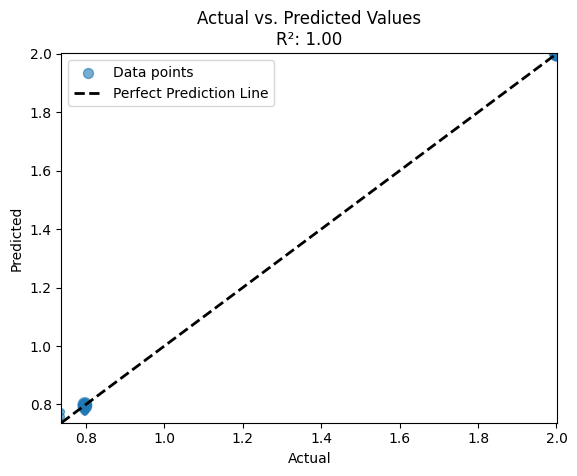

CPU times: user 25.05 s, sys 13.20 s, total 38.25 s
Wall time: 124.45 s


In [24]:
%%timed_and_log_detailed
similarities_wd = []
similarities_cosine = []
perturbations_vect2 = []
perturbation_texts = []  # Store the perturbation texts

# Loop for perturbations
for i in range(20):
    # Make a copy of the original vector for each iteration
    perturbation_vector = original.copy().flatten()

    # Randomly choose one or more parts to remove
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

    # Set the selected parts to 0 in the perturbation vector
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0

    # Append the perturbation vector to perturbations_vect2
    perturbations_vect2.append(perturbation_vector)

    # Perturb the KG by removing the selected parts
    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

    # Create a temporary graph for the perturbed KG
    graph_temp = NetworkxEntityGraph()
    for (node1, relation, node2) in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

    # Generate response using GraphQAChain
    chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
    temp_response = chain.run(question)

    # Store the perturbed response text
    perturbation_texts.append(temp_response)

    # Get embedding for the perturbed response
    temp_response_embedding = get_embedding(temp_response)


    # Calculate Wasserstein distance between the original and perturbed responses
    similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
    similarities_wd.append(similarity_wd)

    # Calculate cosine similarity between the original and perturbed responses
    similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
    similarities_cosine.append(similarity_cosine)

    print(f"Iteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {temp_response}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations_vect2 to a numpy array for pairwise distance calculation
perturbations_vect2 = np.array(perturbations_vect2)

# Calculate cosine distances between perturbation vectors and the original vector
distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

# Assuming you may use kernel width in further computations
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print all similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Optionally print all perturbation texts together for a consolidated view
print("\n--- Summary of Perturbations ---")
for i, text in enumerate(perturbation_texts):
    print(f"Perturbation {i + 1}: {text}")#bayLime_sum_inv_wd_cosine
epsilon = 1e-6

# Calculate the inverse of each Wasserstein distance, adding a small epsilon to avoid division by zero
inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]

# Find the minimum and maximum of the inverse Wasserstein distances
min_value = min(inverse_similarities_wd)
max_value = max(inverse_similarities_wd)

# Scale inverse Wasserstein distances between 0 and 1
scaled_similarities_wd = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]

# Combine the scaled inverse Wasserstein distances and cosine similarities
Similarities_ = [wd + cos for wd, cos in zip(scaled_similarities_wd, similarities_cosine)]
# Print the combined list of similarities
print(Similarities_)
simpler_model = BayesianRidge()
simpler_model.fit(X=perturbations_vect2, y= Similarities_, sample_weight=weights)
coeff = simpler_model.coef_
# Call the function
plot_knowledge_graph_explainability(kg, part_indices, coeff)
y_true = np.array(Similarities_).ravel()
y_pred = simpler_model.predict(perturbations_vect2).ravel()

# Call the function
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
# Call the function
plot_actual_vs_predicted(y_true, y_pred, weights)

This code trains a Bayesian Ridge regression model to learn the relationship between perturbation vectors
(`perturbations_vect2`) and the combined similarity metric (`Similarities_`). The model incorporates sample
weights (`weights`) to prioritize certain data points. After training, the coefficients (`coeff`) of the model
are extracted, which represent the importance of each feature in predicting the similarity metric.

This code defines the importance coefficients (`coeff`) for different parts of the knowledge graph
and visualizes their explainability using the `plot_knowledge_graph_explainability` function. The
coefficients indicate the contribution of each part to the overall fidelity, and the visualization
highlights these contributions through node and edge color mappings in the graph.

This code calculates fidelity metrics to evaluate the performance of the Bayesian Ridge regression model.
The true similarity values (`y_true`) and predicted values (`y_pred`) are passed to the
`calculate_fidelity_metrics` function, along with sample weights (`weights`) and model coefficients (`coeff`).
The function outputs metrics like MSE, R², weighted R², and other advanced measures for a comprehensive
assessment of the model's fidelity.

This code generates a scatter plot to visually compare the true similarity values (`y_true`) against the
predicted values (`y_pred`). The function `plot_actual_vs_predicted` scales point sizes based on sample
weights (`weights`) and includes a reference line for perfect predictions (y = x). It also displays the
R² score to quantify the model's predictive accuracy.

# BayLIME: Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity.

Iteration 1
Parts removed: ['Part 2', 'Part 7', 'Part 9', 'Part 6']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Wasserstein Distance with original answer: 0.0007659067200188231
Cosine Similarity with original answer: 1.0

Iteration 2
Parts removed: ['Part 6', 'Part 8', 'Part 4', 'Part 1', 'Part 5', 'Part 2']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-pla

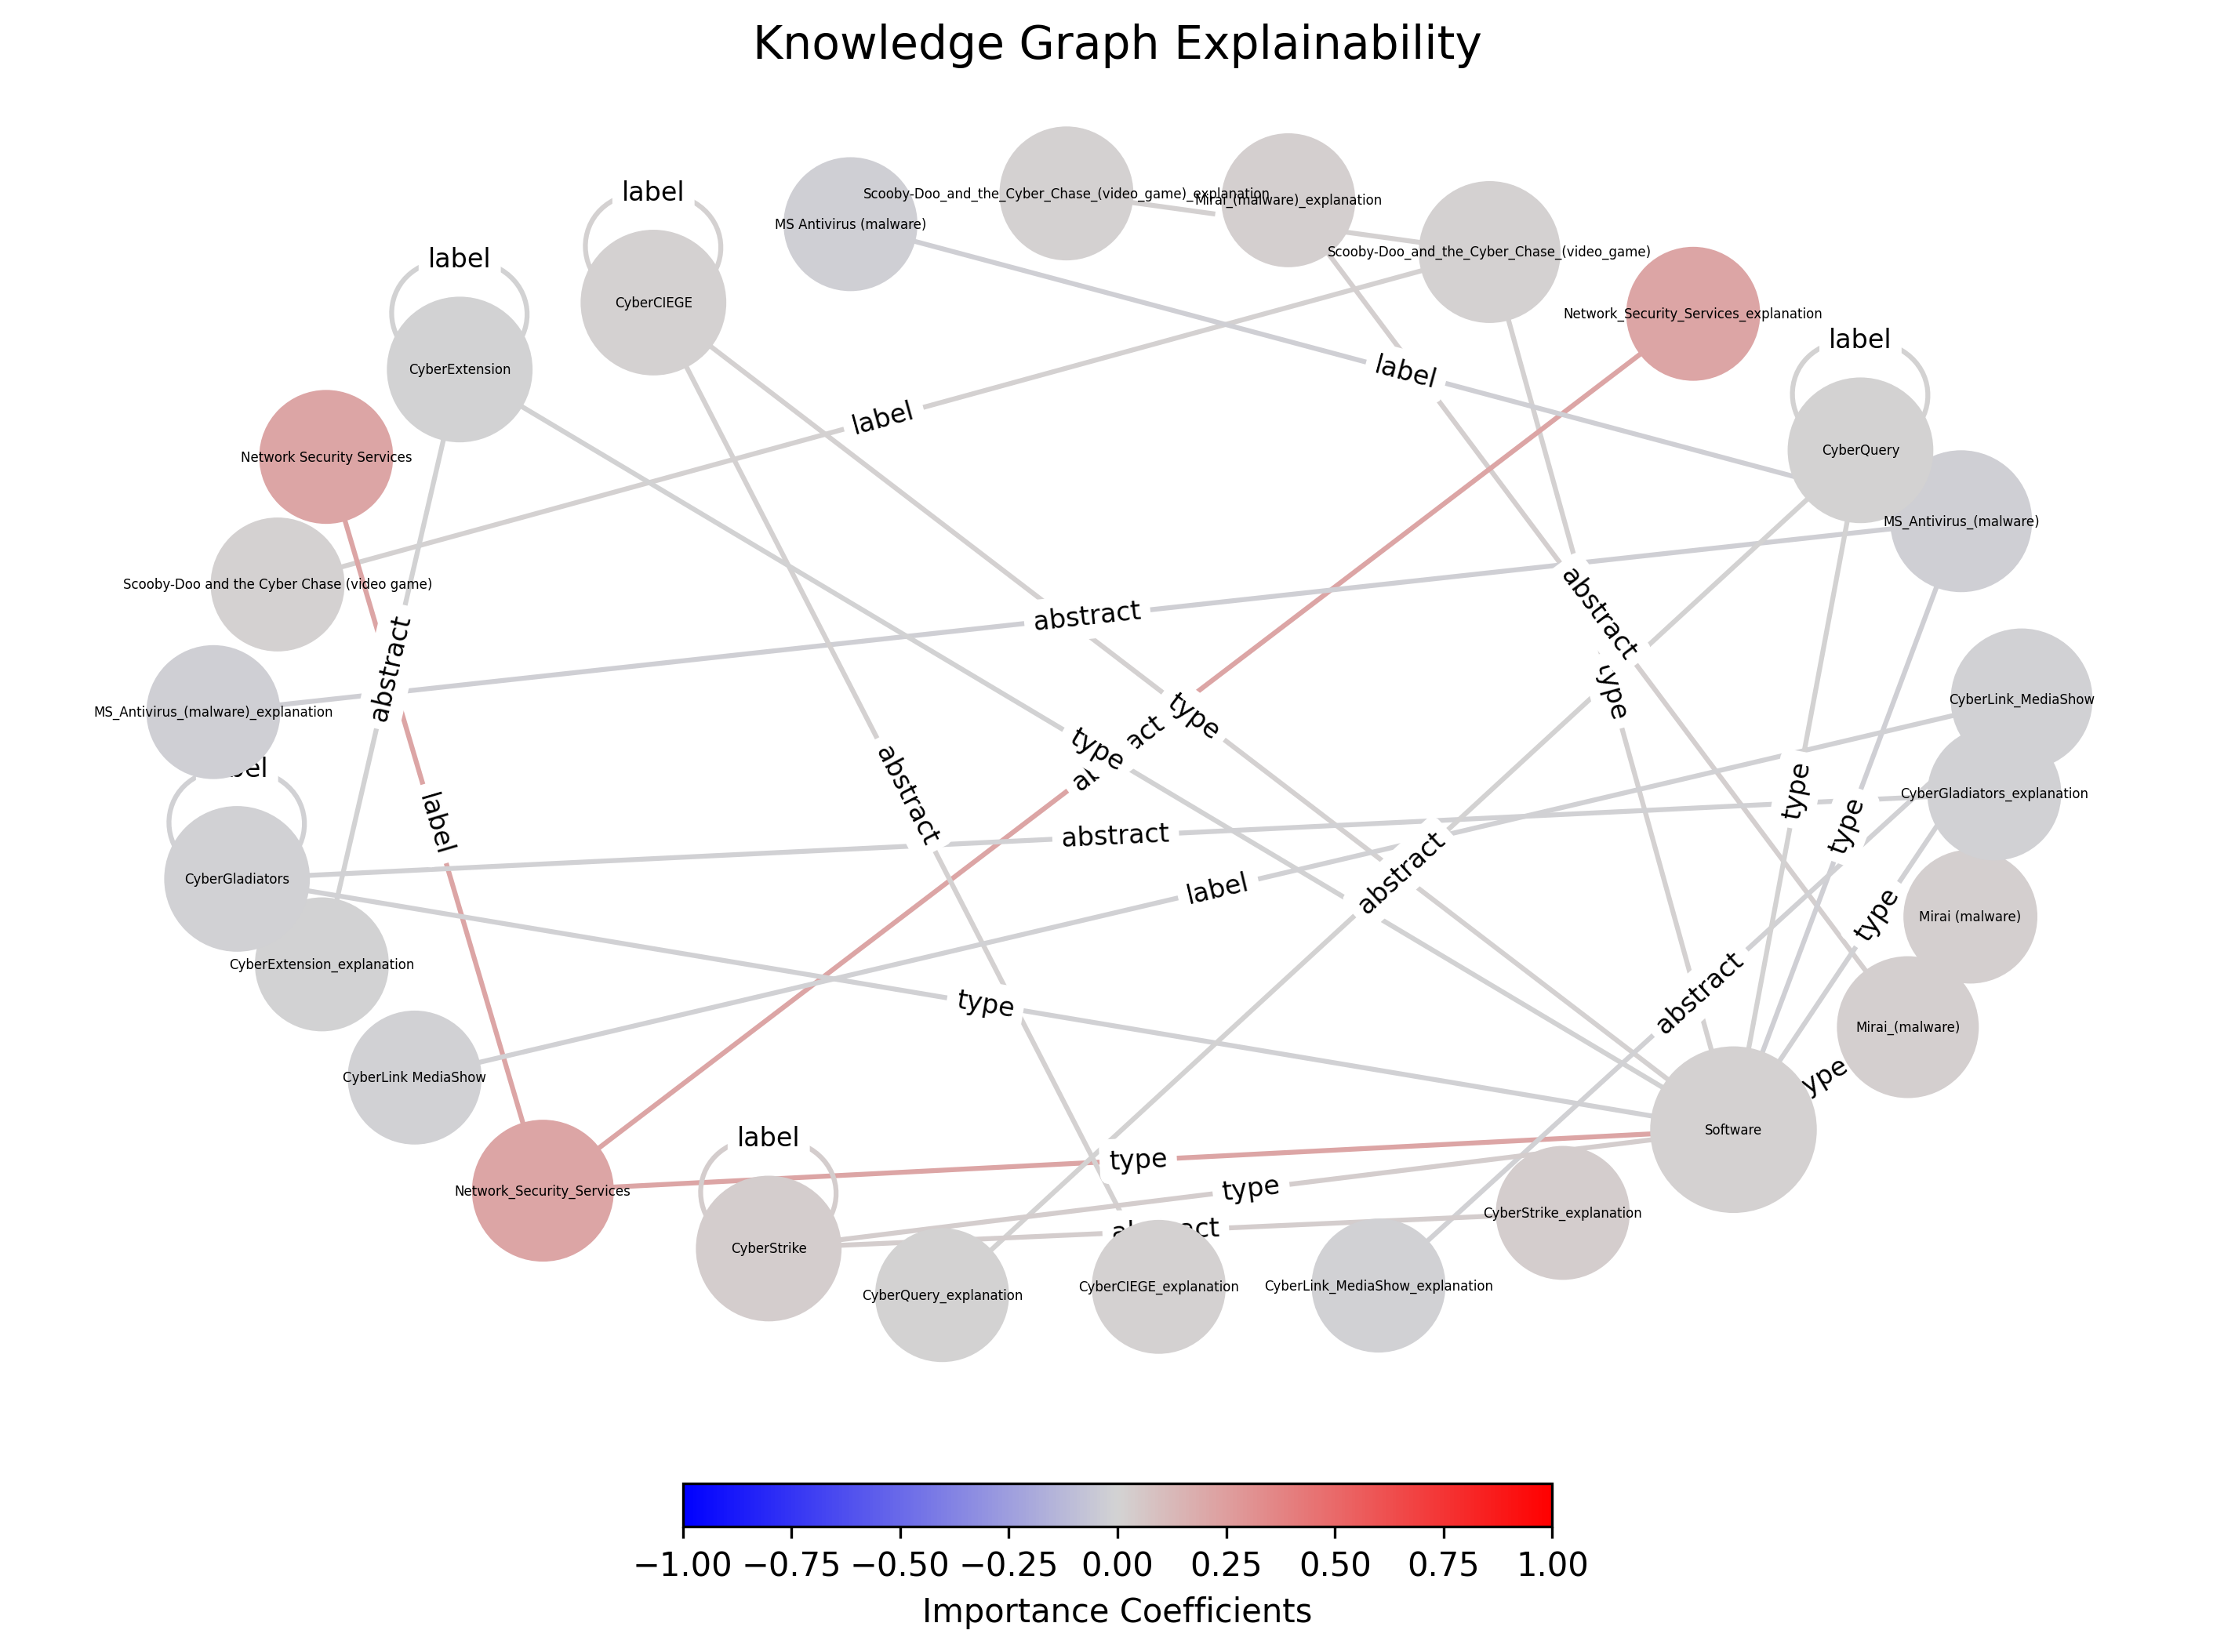

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 0.00018928981936402355
R-squared (R²): 0.9846712979467386
Mean Absolute Error (MAE): 0.007940375214414937
Mean Loss (Lm): 0.000483290791740254
Mean L1 Loss: 0.016135950731769506
Mean L2 Loss: 0.0005421911600870433
Weighted L1 Loss: 0.003518726117061698
Weighted L2 Loss: 8.388256387190858e-05
Weighted R-squared (R²ω): 0.9846712979467386
Weighted Adjusted R-squared (Rˆ²ω): 0.9676394067764481
----------------------------------------------------------------------------------------------------


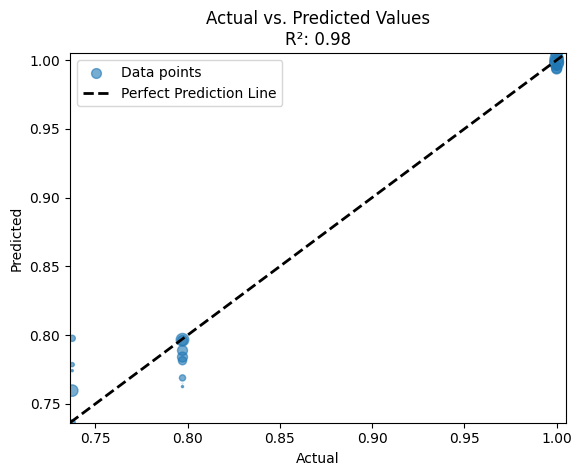

CPU times: user 54.39 s, sys 15.47 s, total 69.86 s
Wall time: 133.79 s


In [26]:
%%timed_and_log_detailed
similarities_wd = []
similarities_cosine = []
perturbations_vect2 = []
perturbation_texts = []  # Store the perturbation texts

# Loop for perturbations
for i in range(20):
    # Make a copy of the original vector for each iteration
    perturbation_vector = original.copy().flatten()

    # Randomly choose one or more parts to remove
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

    # Set the selected parts to 0 in the perturbation vector
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0

    # Append the perturbation vector to perturbations_vect2
    perturbations_vect2.append(perturbation_vector)

    # Perturb the KG by removing the selected parts
    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

    # Create a temporary graph for the perturbed KG
    graph_temp = NetworkxEntityGraph()
    for (node1, relation, node2) in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

    # Generate response using GraphQAChain
    chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
    temp_response = chain.run(question)

    # Store the perturbed response text
    perturbation_texts.append(temp_response)

    # Get embedding for the perturbed response
    temp_response_embedding = get_embedding(temp_response)

    # Calculate cosine similarity between the original and perturbed responses
    similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
    similarities_cosine.append(similarity_cosine)

    print(f"Iteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {temp_response}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations_vect2 to a numpy array for pairwise distance calculation
perturbations_vect2 = np.array(perturbations_vect2)

# Calculate cosine distances between perturbation vectors and the original vector
distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

# Assuming you may use kernel width in further computations
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print all similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Optionally print all perturbation texts together for a consolidated view
print("\n--- Summary of Perturbations ---")
for i, text in enumerate(perturbation_texts):
    print(f"Perturbation {i + 1}: {text}")
simpler_model =  BayesianRidge()
simpler_model.fit(X=perturbations_vect2, y=similarities_cosine, sample_weight=weights)
coeff = simpler_model.coef_
# Call the function
plot_knowledge_graph_explainability(kg, part_indices, coeff)
y_true = np.array(similarities_cosine).ravel()
y_pred = simpler_model.predict(perturbations_vect2).ravel()

# Call the function
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
# Call the function
plot_actual_vs_predicted(y_true, y_pred, weights)

# BayLIME: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine


Iteration 1
Parts removed: ['Part 8', 'Part 3', 'Part 7', 'Part 5', 'Part 10', 'Part 1', 'Part 9', 'Part 4', 'Part 6', 'Part 2']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network Security Services (NSS) is a set of open source libraries designed to support cross-platform development of security-enabled client and server applications.

Knowledge Triplets:

1. Subject: Network Security Services
Predicate: is
Object: a set of open source libraries

2. Subject: NSS
Predicate: is designed to support
Object: cross-platform development of security-enabled client and server applications

3. Subject: Security-enabled client and server applications
Predicate: are
Object: supported by NSS
Wasserstein Distance with original answer: 0.0008141576723856103
Cosine Similarity with original answer: 0.7373949696600703

Itera

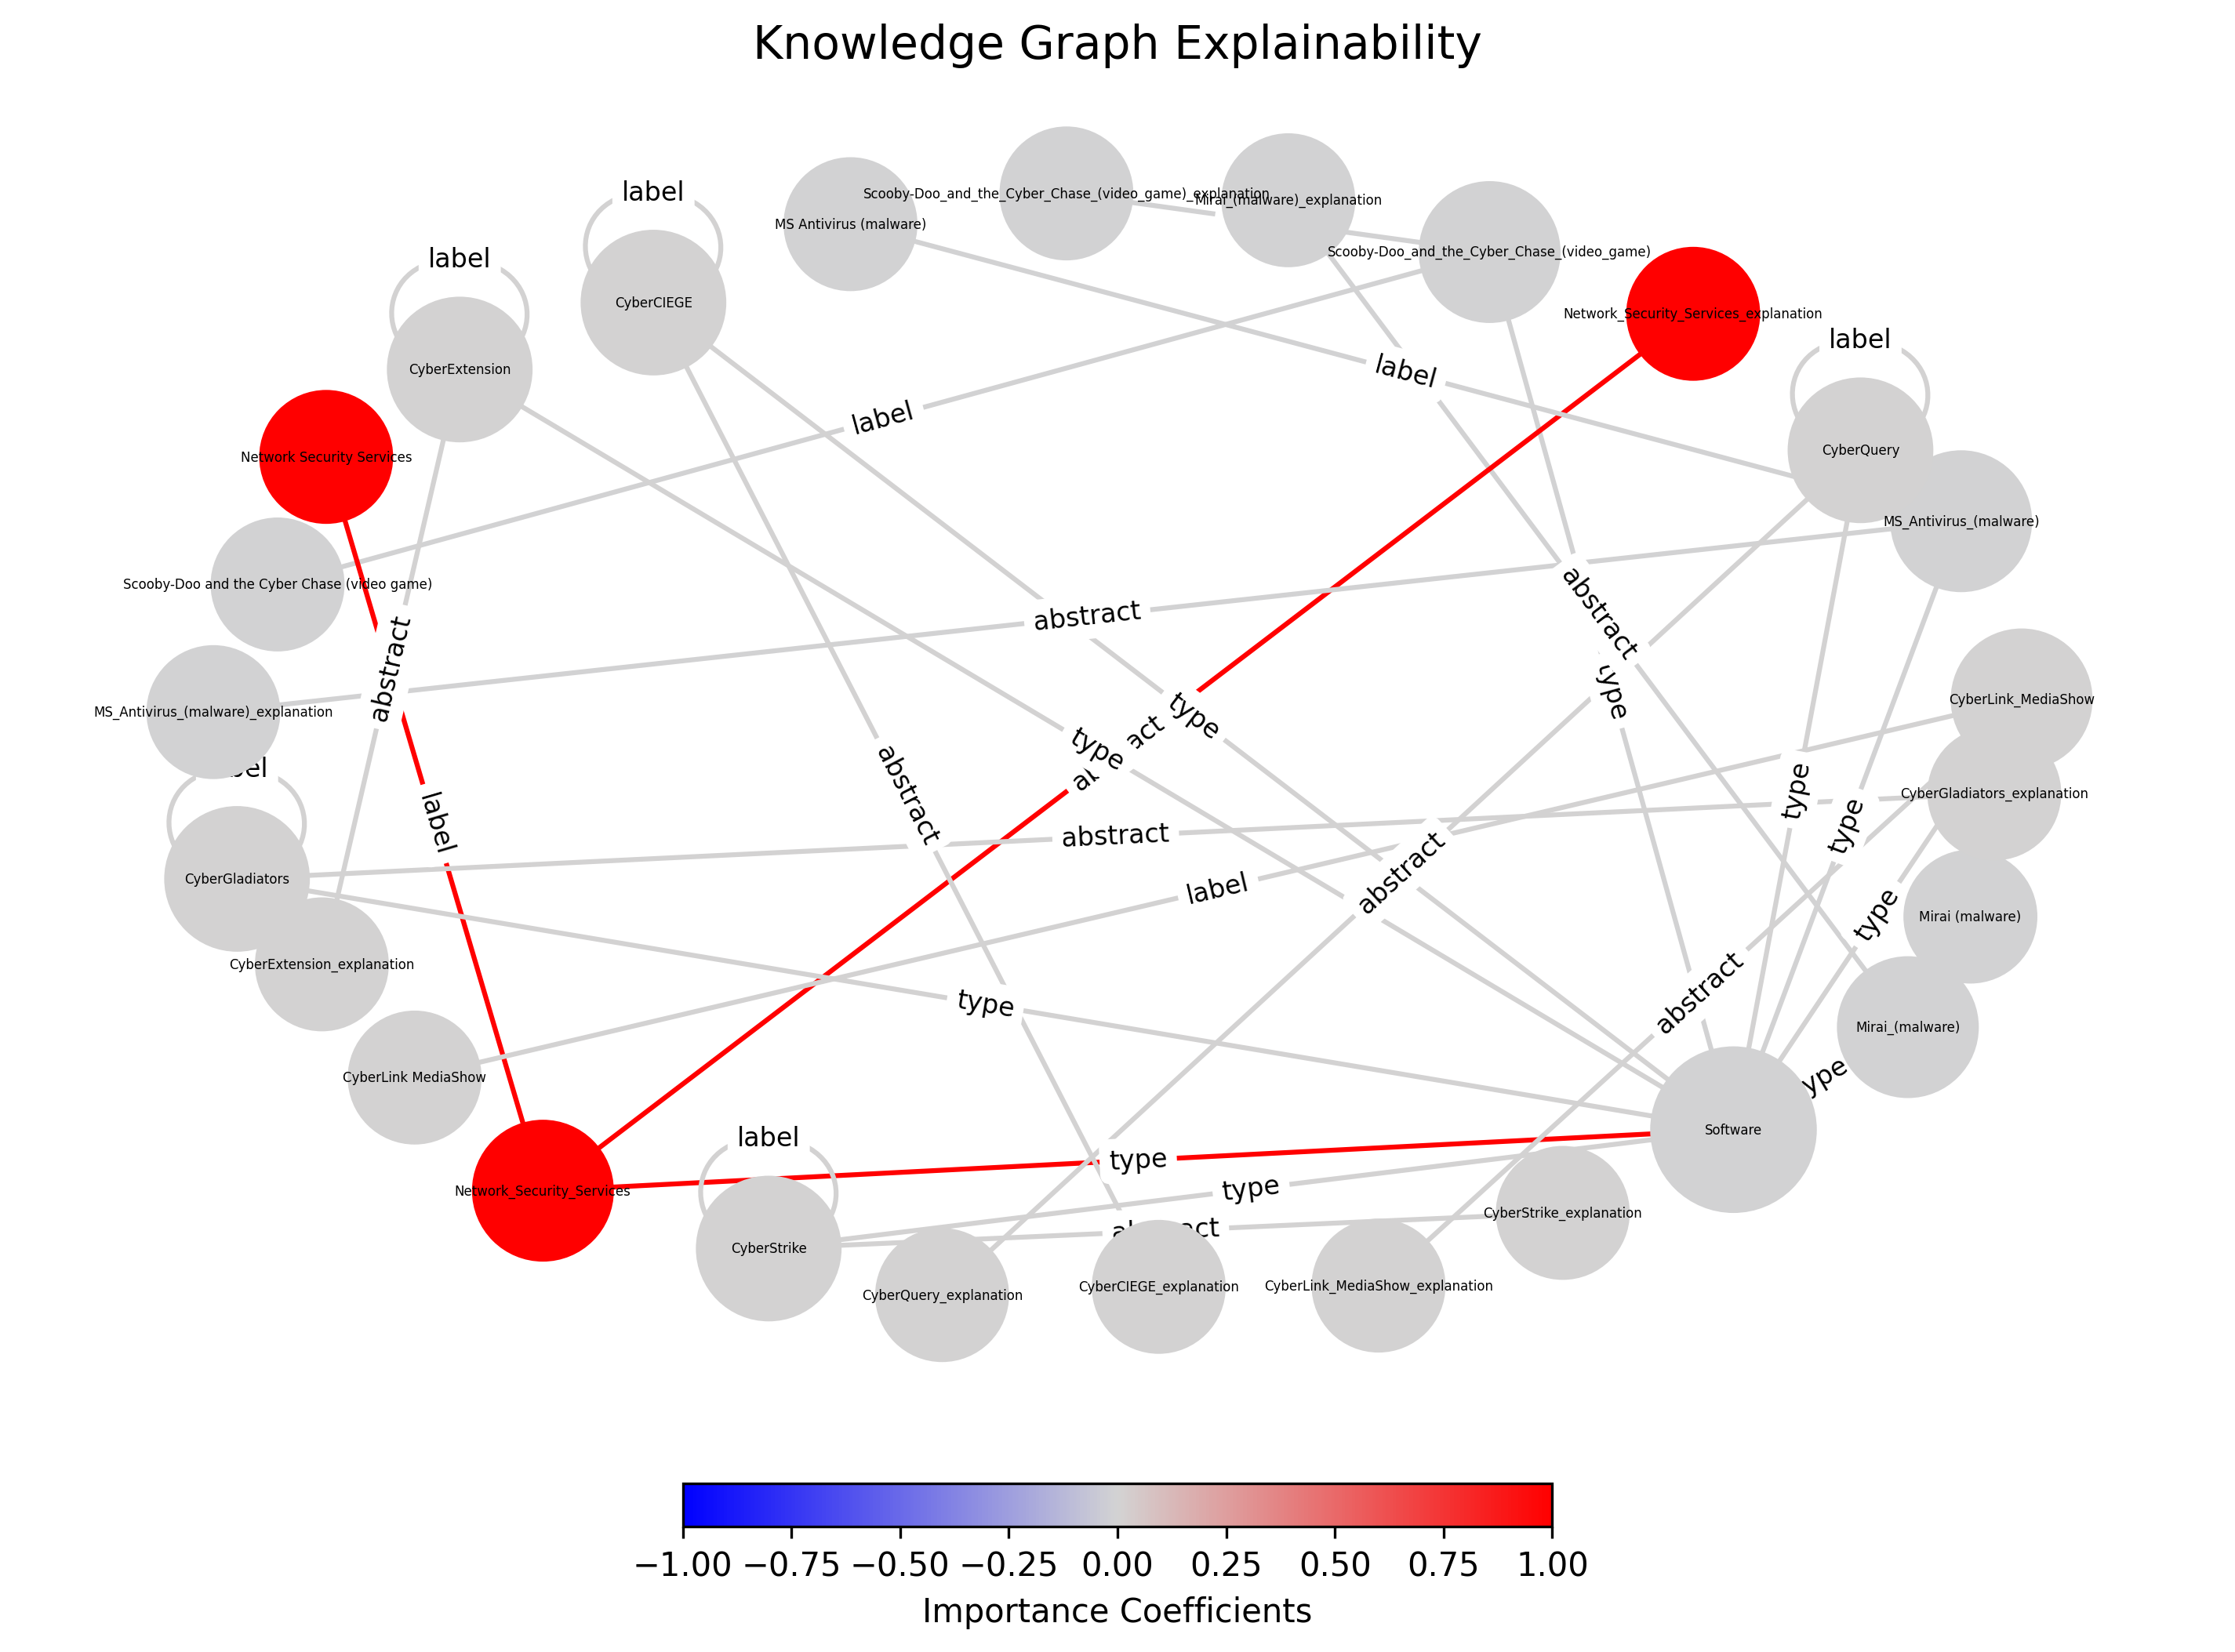

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 4.156352956294724e-10
R-squared (R²): 0.9999999983289902
Mean Absolute Error (MAE): 1.7521817724039266e-05
Mean Loss (Lm): 5.29083835160149e-06
Mean L1 Loss: 2.120028866663023e-05
Mean L2 Loss: 6.158813880011568e-10
Weighted L1 Loss: 1.0410176503522168e-05
Weighted L2 Loss: 2.46939949766751e-10
Weighted R-squared (R²ω): 0.9999999983289902
Weighted Adjusted R-squared (Rˆ²ω): 0.9999999964723127
----------------------------------------------------------------------------------------------------


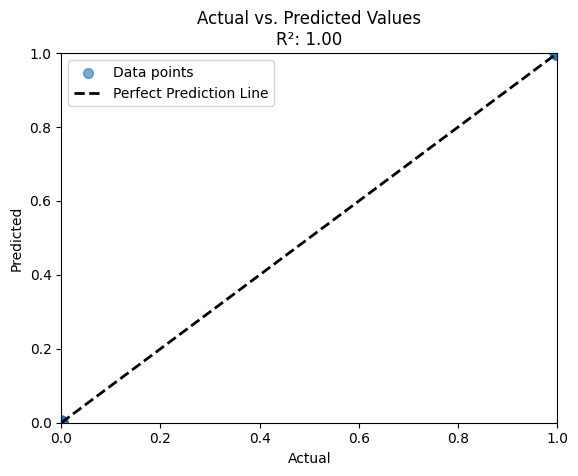

CPU times: user 33.26 s, sys 13.55 s, total 46.81 s
Wall time: 126.52 s


In [27]:
%%timed_and_log_detailed
similarities_wd = []
similarities_cosine = []
perturbations_vect2 = []
perturbation_texts = []  # Store the perturbation texts

# Loop for perturbations
for i in range(20):
    # Make a copy of the original vector for each iteration
    perturbation_vector = original.copy().flatten()

    # Randomly choose one or more parts to remove
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

    # Set the selected parts to 0 in the perturbation vector
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0

    # Append the perturbation vector to perturbations_vect2
    perturbations_vect2.append(perturbation_vector)

    # Perturb the KG by removing the selected parts
    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

    # Create a temporary graph for the perturbed KG
    graph_temp = NetworkxEntityGraph()
    for (node1, relation, node2) in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

    # Generate response using GraphQAChain
    chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
    temp_response = chain.run(question)

    # Store the perturbed response text
    perturbation_texts.append(temp_response)

    # Get embedding for the perturbed response
    temp_response_embedding = get_embedding(temp_response)


    # Calculate Wasserstein distance between the original and perturbed responses
    similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
    similarities_wd.append(similarity_wd)

    # Calculate cosine similarity between the original and perturbed responses
    similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
    similarities_cosine.append(similarity_cosine)

    print(f"Iteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {temp_response}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations_vect2 to a numpy array for pairwise distance calculation
perturbations_vect2 = np.array(perturbations_vect2)

# Calculate cosine distances between perturbation vectors and the original vector
distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

# Assuming you may use kernel width in further computations
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print all similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Optionally print all perturbation texts together for a consolidated view
print("\n--- Summary of Perturbations ---")
for i, text in enumerate(perturbation_texts):
    print(f"Perturbation {i + 1}: {text}")

epsilon = 1e-6

# Calculate the inverse of each Wasserstein distance, adding a small epsilon to avoid division by zero
inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]

# Find the minimum and maximum of the inverse Wasserstein distances
min_value = min(inverse_similarities_wd)
max_value = max(inverse_similarities_wd)

# Scale inverse Wasserstein distances between 0 and 1
scaled_similarities_wd = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]
Similarities_ = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]
print(Similarities_)
simpler_model = BayesianRidge()
simpler_model.fit(X=perturbations_vect2, y=Similarities_, sample_weight=weights)
coeff = simpler_model.coef_
# Call the function
plot_knowledge_graph_explainability(kg, part_indices, coeff)
y_true = np.array(Similarities_).ravel()
y_pred = simpler_model.predict(perturbations_vect2).ravel()

# Call the function
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
# Call the function
plot_actual_vs_predicted(y_true, y_pred, weights)

# Linear : Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity.

Iteration 1
Parts removed: ['Part 3', 'Part 7', 'Part 10', 'Part 6', 'Part 1', 'Part 9', 'Part 5']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network Security Services (NSS) is a set of open source libraries designed to support cross-platform development of security-enabled client and server applications.
Wasserstein Distance with original answer: 0.0007659067200188231
Cosine Similarity with original answer: 0.7971710188976234

Iteration 2
Parts removed: ['Part 5']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform developmen

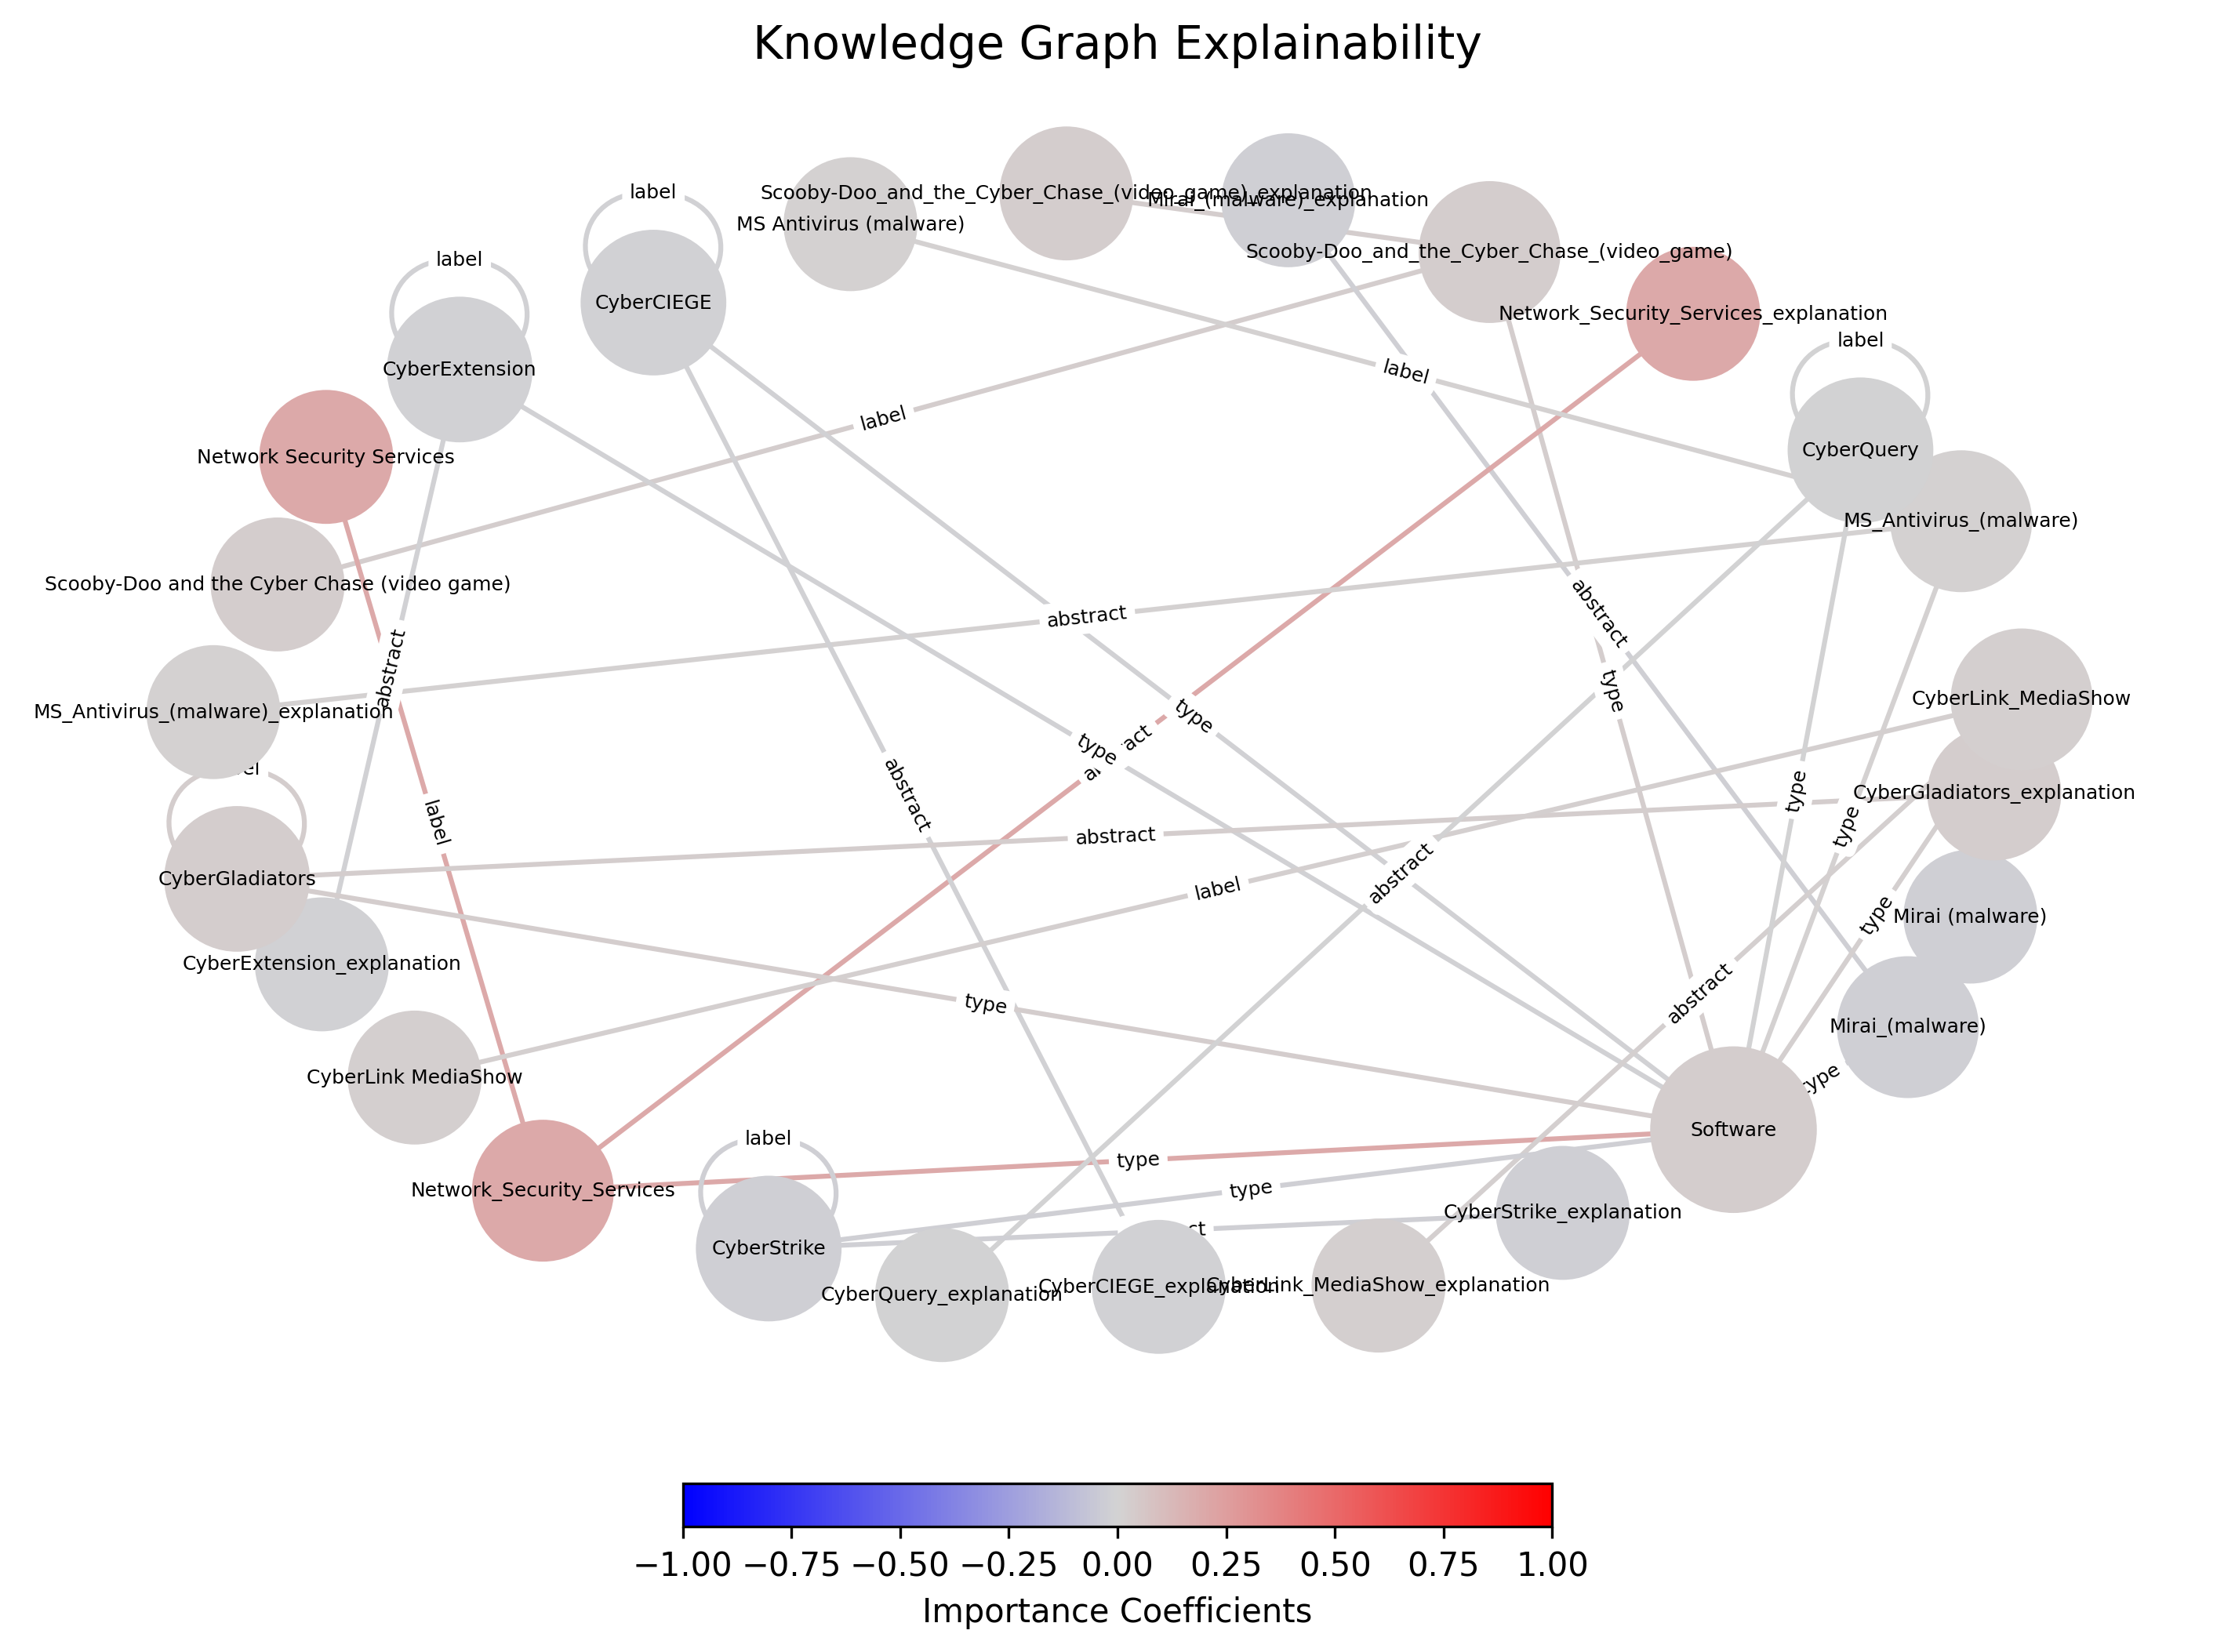

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 3.9173055177849675e-05
R-squared (R²): 0.9966227314687572
Mean Absolute Error (MAE): 0.0029357543773263117
Mean Loss (Lm): 0.004383206008665819
Mean L1 Loss: 0.01152289586751859
Mean L2 Loss: 0.00036225363397983075
Weighted L1 Loss: 0.0013831387990597308
Weighted L2 Loss: 1.8455826179687653e-05
Weighted R-squared (R²ω): 0.9966227314687572
Weighted Adjusted R-squared (Rˆ²ω): 0.9928702108784875
----------------------------------------------------------------------------------------------------


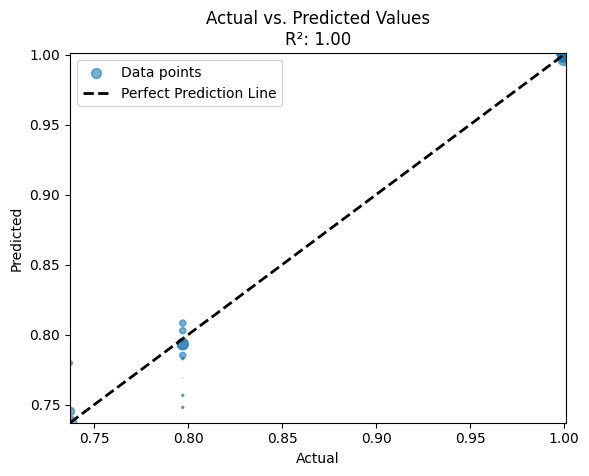

CPU times: user 27.46 s, sys 15.58 s, total 43.04 s
Wall time: 144.66 s


In [31]:
%%timed_and_log_detailed
similarities_wd = []
similarities_cosine = []
perturbations_vect2 = []
perturbation_texts = []  # Store the perturbation texts

# Loop for perturbations
for i in range(20):
    # Make a copy of the original vector for each iteration
    perturbation_vector = original.copy().flatten()

    # Randomly choose one or more parts to remove
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

    # Set the selected parts to 0 in the perturbation vector
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0

    # Append the perturbation vector to perturbations_vect2
    perturbations_vect2.append(perturbation_vector)

    # Perturb the KG by removing the selected parts
    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

    # Create a temporary graph for the perturbed KG
    graph_temp = NetworkxEntityGraph()
    for (node1, relation, node2) in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

    # Generate response using GraphQAChain
    chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
    temp_response = chain.run(question)

    # Store the perturbed response text
    perturbation_texts.append(temp_response)

    # Get embedding for the perturbed response
    temp_response_embedding = get_embedding(temp_response)

    # Calculate cosine similarity between the original and perturbed responses
    similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
    similarities_cosine.append(similarity_cosine)

    print(f"Iteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {temp_response}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations_vect2 to a numpy array for pairwise distance calculation
perturbations_vect2 = np.array(perturbations_vect2)

# Calculate cosine distances between perturbation vectors and the original vector
distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

# Assuming you may use kernel width in further computations
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print all similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Optionally print all perturbation texts together for a consolidated view
print("\n--- Summary of Perturbations ---")
for i, text in enumerate(perturbation_texts):
    print(f"Perturbation {i + 1}: {text}")
simpler_model =  LinearRegression()
simpler_model.fit(X=perturbations_vect2, y=similarities_cosine, sample_weight=weights)
coeff = simpler_model.coef_
# Call the function
plot_knowledge_graph_explainability(kg, part_indices, coeff)
y_true = np.array(similarities_cosine).ravel()
y_pred = simpler_model.predict(perturbations_vect2).ravel()

# Call the function
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
# Call the function
plot_actual_vs_predicted(y_true, y_pred, weights)

# Linear: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine

Iteration 1
Parts removed: ['Part 6', 'Part 5', 'Part 9', 'Part 2']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Wasserstein Distance with original answer: 0.0
Cosine Similarity with original answer: 1.0

Iteration 2
Parts removed: ['Part 7', 'Part 9', 'Part 8']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and

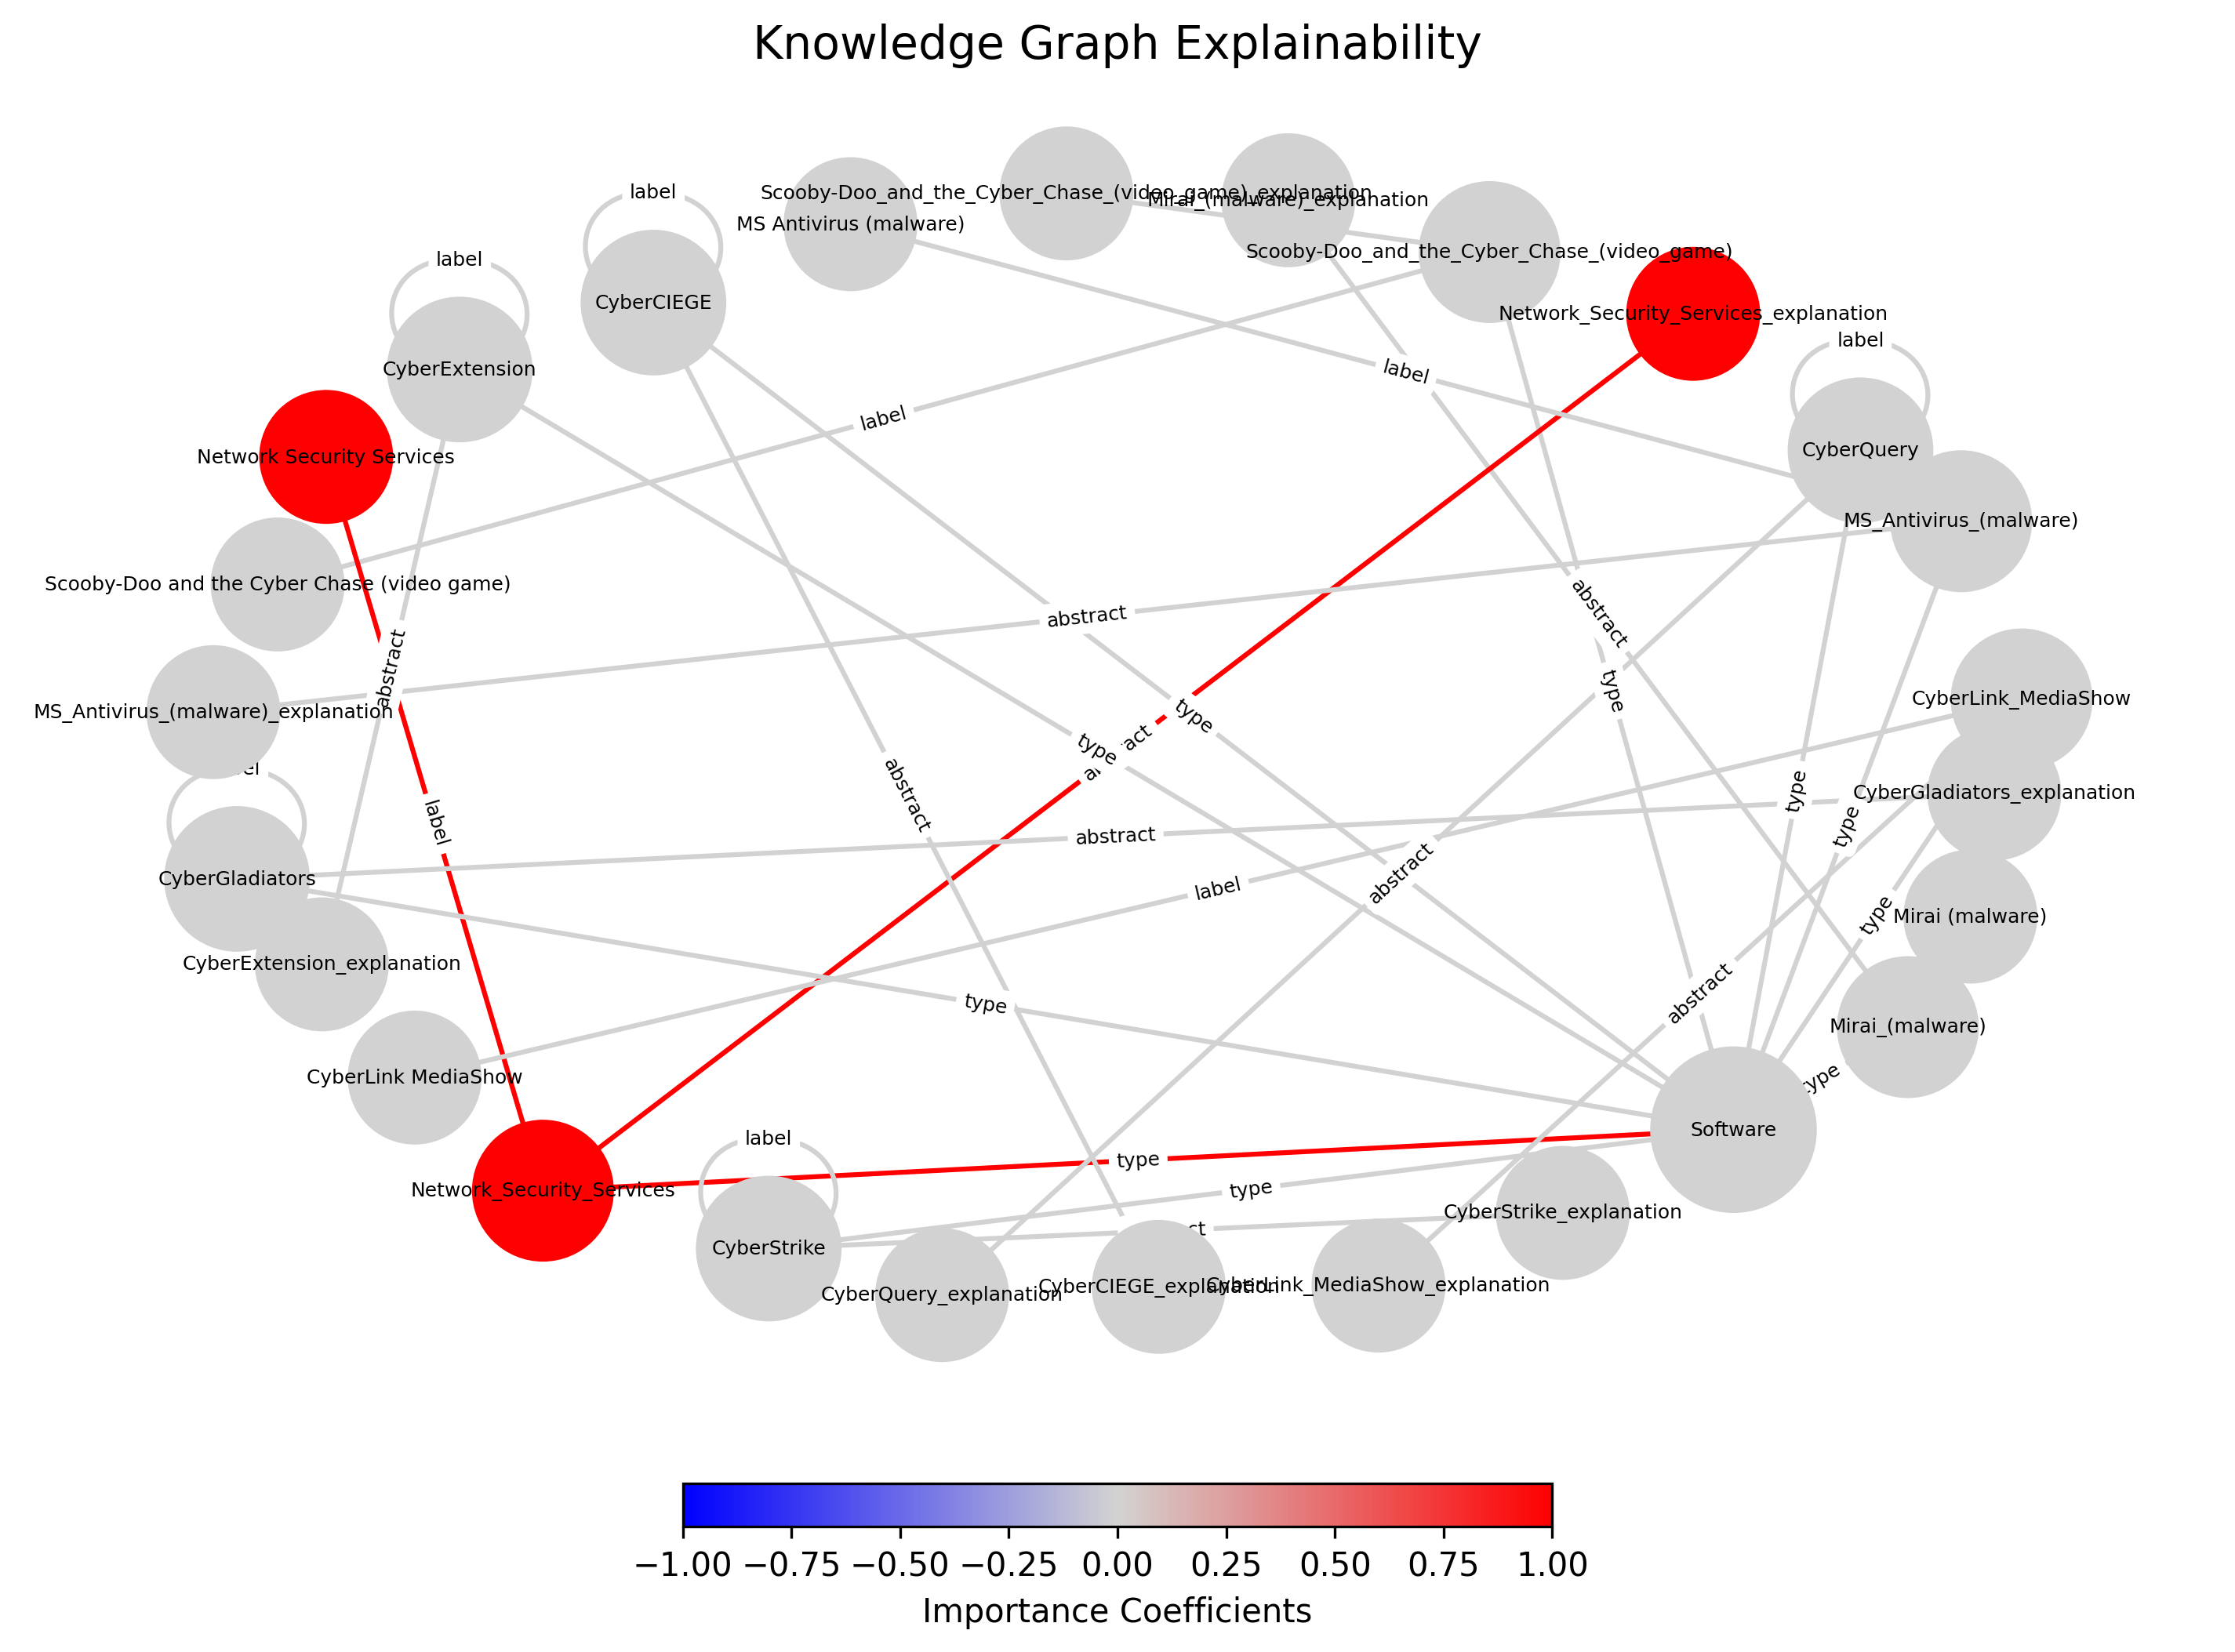

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 7.649596698083664e-11
R-squared (R²): 0.999999999691843
Mean Absolute Error (MAE): 5.720163463452248e-06
Mean Loss (Lm): 1.76918047284369e-06
Mean L1 Loss: 1.0194205348931733e-05
Mean L2 Loss: 2.1201907953879391e-10
Weighted L1 Loss: 2.7584290449845196e-06
Weighted L2 Loss: 3.688857818352765e-11
Weighted R-squared (R²ω): 0.999999999691843
Weighted Adjusted R-squared (Rˆ²ω): 0.9999999993494462
----------------------------------------------------------------------------------------------------


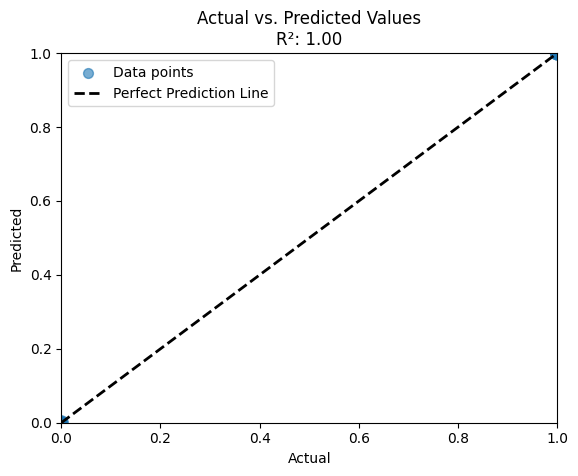

CPU times: user 22.84 s, sys 13.19 s, total 36.03 s
Wall time: 124.96 s


In [32]:
%%timed_and_log_detailed
similarities_wd = []
similarities_cosine = []
perturbations_vect2 = []
perturbation_texts = []  # Store the perturbation texts

# Loop for perturbations
for i in range(20):
    # Make a copy of the original vector for each iteration
    perturbation_vector = original.copy().flatten()

    # Randomly choose one or more parts to remove
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

    # Set the selected parts to 0 in the perturbation vector
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0

    # Append the perturbation vector to perturbations_vect2
    perturbations_vect2.append(perturbation_vector)

    # Perturb the KG by removing the selected parts
    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

    # Create a temporary graph for the perturbed KG
    graph_temp = NetworkxEntityGraph()
    for (node1, relation, node2) in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

    # Generate response using GraphQAChain
    chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
    temp_response = chain.run(question)

    # Store the perturbed response text
    perturbation_texts.append(temp_response)

    # Get embedding for the perturbed response
    temp_response_embedding = get_embedding(temp_response)


    # Calculate Wasserstein distance between the original and perturbed responses
    similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
    similarities_wd.append(similarity_wd)

    # Calculate cosine similarity between the original and perturbed responses
    similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
    similarities_cosine.append(similarity_cosine)

    print(f"Iteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {temp_response}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations_vect2 to a numpy array for pairwise distance calculation
perturbations_vect2 = np.array(perturbations_vect2)

# Calculate cosine distances between perturbation vectors and the original vector
distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

# Assuming you may use kernel width in further computations
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print all similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Optionally print all perturbation texts together for a consolidated view
print("\n--- Summary of Perturbations ---")
for i, text in enumerate(perturbation_texts):
    print(f"Perturbation {i + 1}: {text}")

epsilon = 1e-6

# Calculate the inverse of each Wasserstein distance, adding a small epsilon to avoid division by zero
inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]

# Find the minimum and maximum of the inverse Wasserstein distances
min_value = min(inverse_similarities_wd)
max_value = max(inverse_similarities_wd)

# Scale inverse Wasserstein distances between 0 and 1
scaled_similarities_wd = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]
Similarities_ = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]
print(Similarities_)
simpler_model =  LinearRegression()
simpler_model.fit(X=perturbations_vect2, y=Similarities_, sample_weight=weights)
coeff = simpler_model.coef_
# Call the function
plot_knowledge_graph_explainability(kg, part_indices, coeff)
y_true = np.array(Similarities_).ravel()
y_pred = simpler_model.predict(perturbations_vect2).ravel()

# Call the function
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
# Call the function
plot_actual_vs_predicted(y_true, y_pred, weights)

# Linear : Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine
Cosine Similarity: Measuring Alignment and Fidelity Between Textual Representations
Wasserstein Distance: Evaluating Semantic Shifts Between Textual Representations


Iteration 1
Parts removed: ['Part 7', 'Part 10', 'Part 5']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Wasserstein Distance with original answer: 0.0
Cosine Similarity with original answer: 1.0

Iteration 2
Parts removed: ['Part 8', 'Part 7', 'Part 10', 'Part 9', 'Part 5', 'Part 2', 'Part 4', 'Part 6']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform 

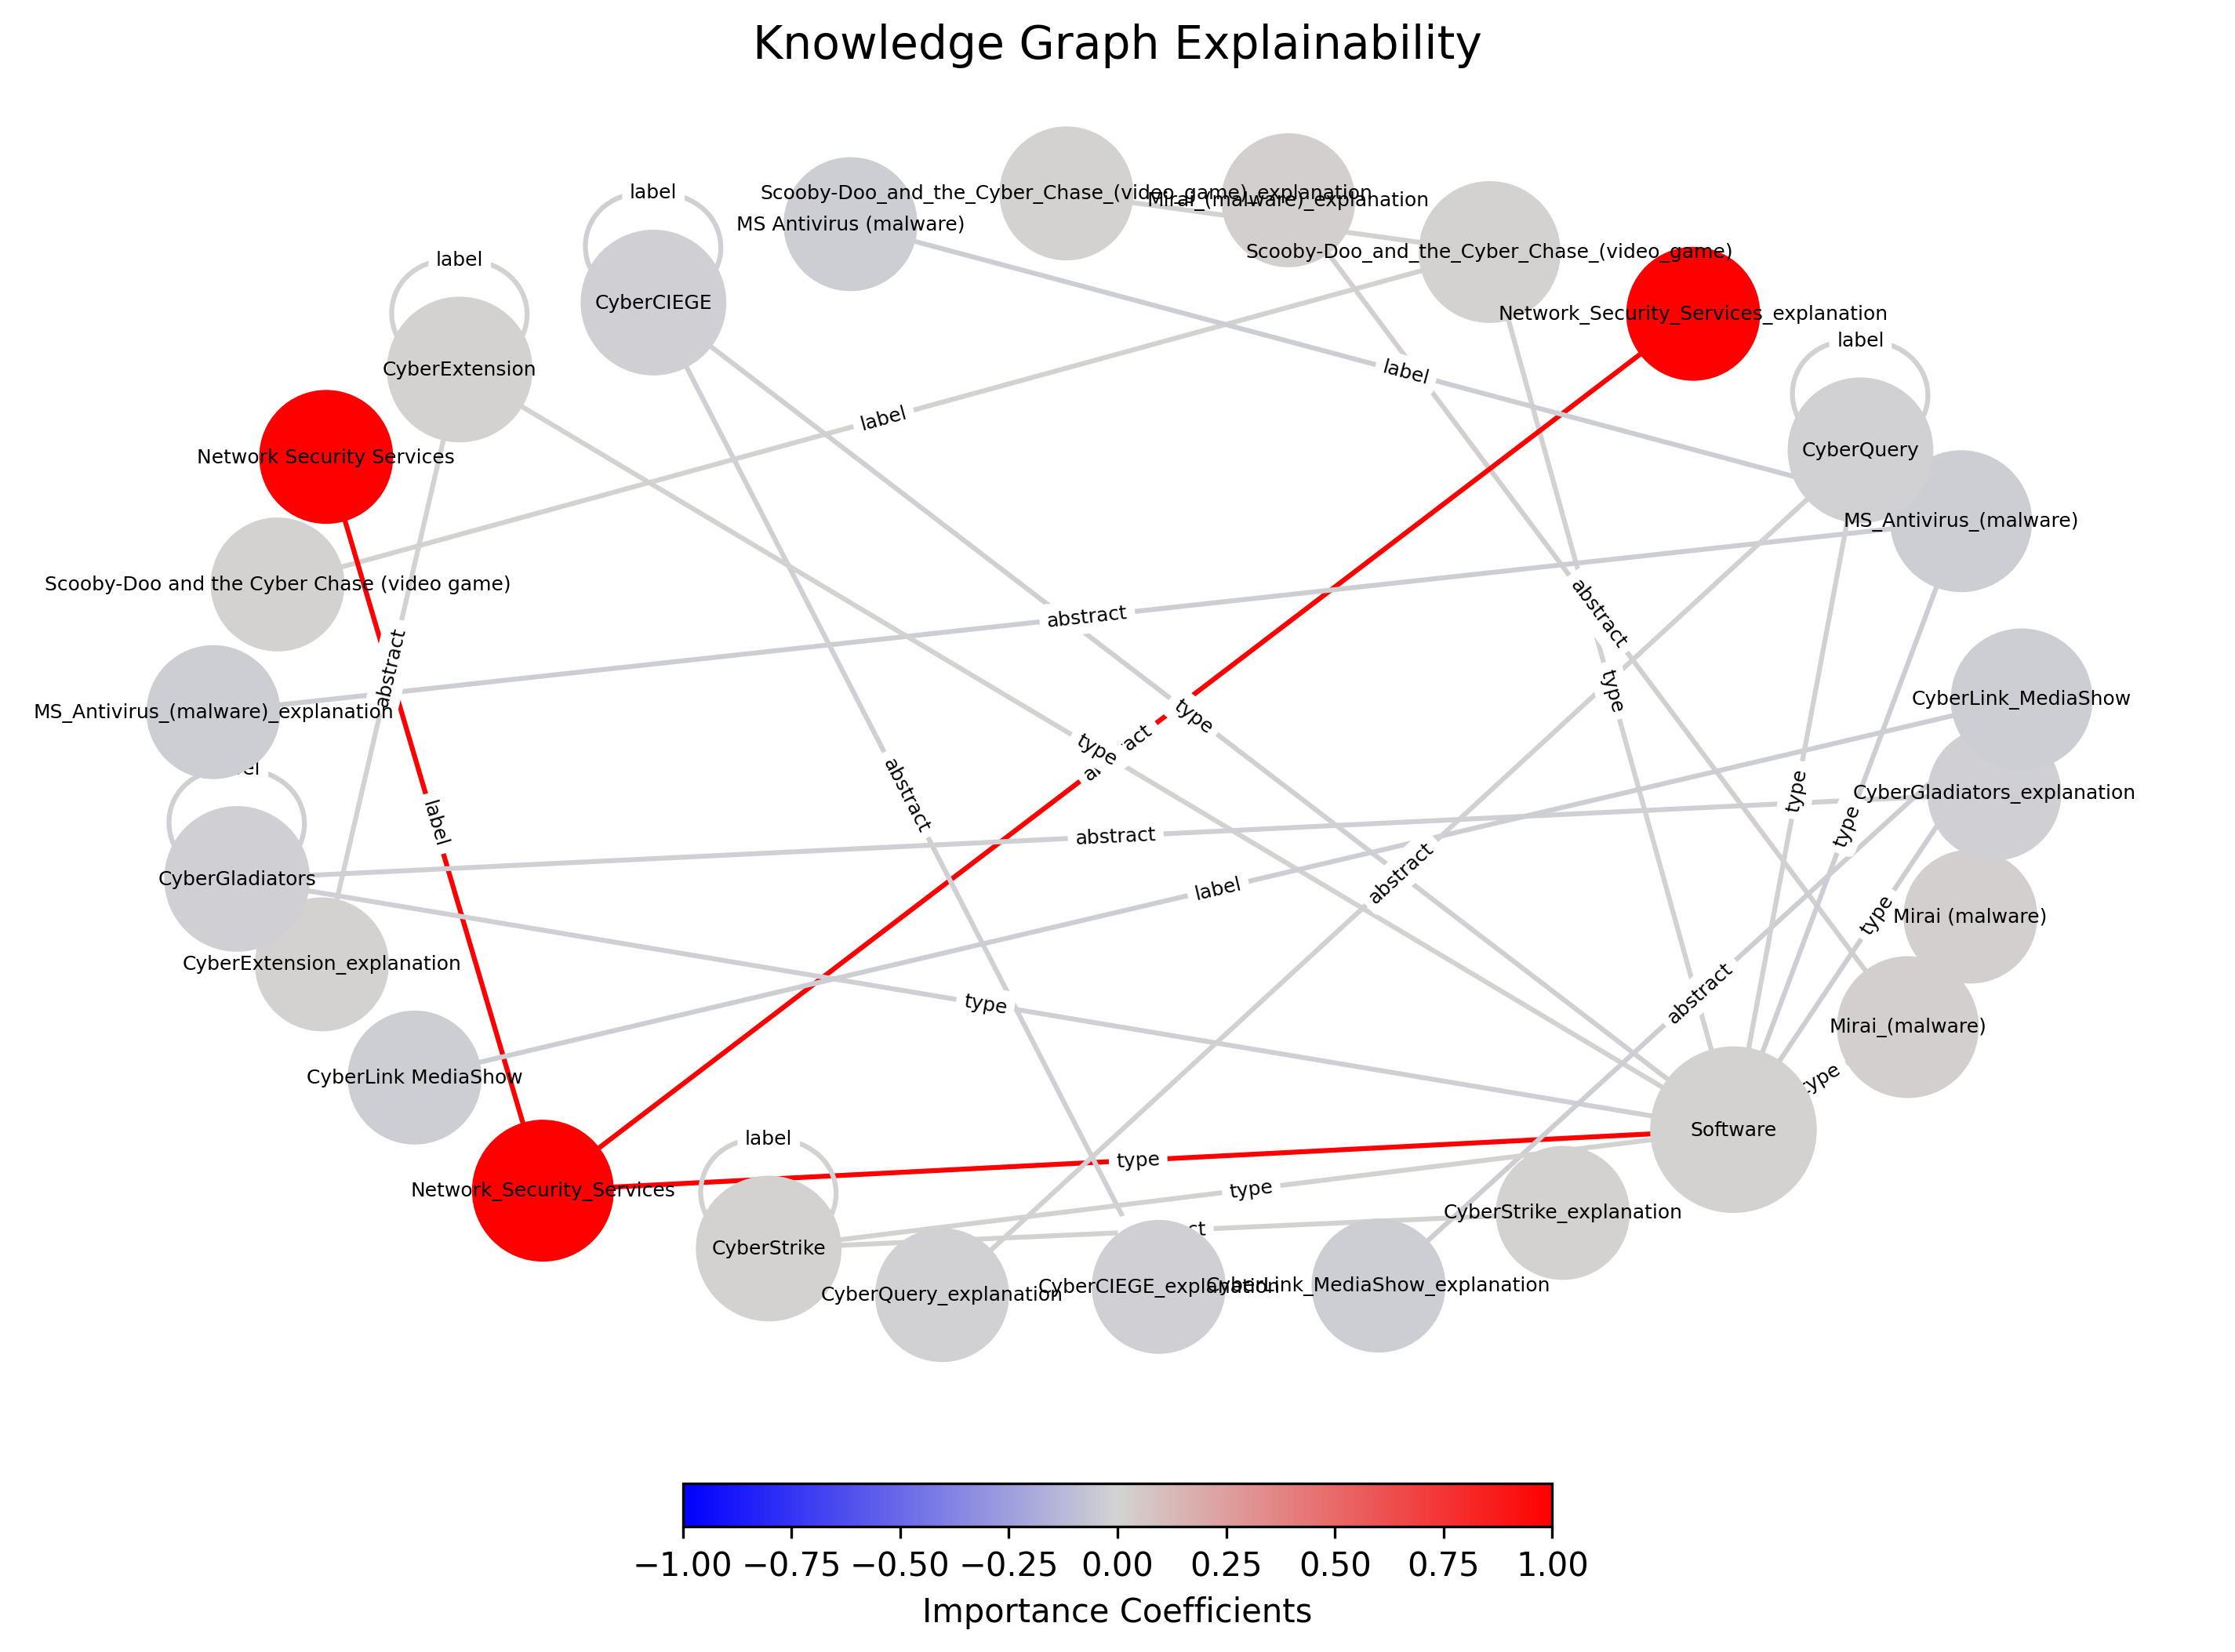

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 5.79888669899004e-05
R-squared (R²): 0.9998437216583164
Mean Absolute Error (MAE): 0.006216002192261813
Mean Loss (Lm): 0.0001686947177488296
Mean L1 Loss: 0.007278178433267746
Mean L2 Loss: 8.726296129575188e-05
Weighted L1 Loss: 0.00237859594181933
Weighted L2 Loss: 2.218983832801525e-05
Weighted R-squared (R²ω): 0.9998437216583164
Weighted Adjusted R-squared (Rˆ²ω): 0.9996700790564457
----------------------------------------------------------------------------------------------------


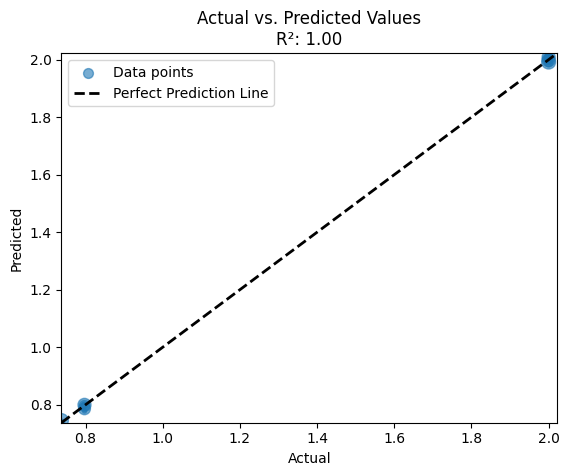

CPU times: user 33.38 s, sys 15.81 s, total 49.19 s
Wall time: 137.23 s


In [33]:
%%timed_and_log_detailed
similarities_wd = []
similarities_cosine = []
perturbations_vect2 = []
perturbation_texts = []  # Store the perturbation texts

# Loop for perturbations
for i in range(20):
    # Make a copy of the original vector for each iteration
    perturbation_vector = original.copy().flatten()

    # Randomly choose one or more parts to remove
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

    # Set the selected parts to 0 in the perturbation vector
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0

    # Append the perturbation vector to perturbations_vect2
    perturbations_vect2.append(perturbation_vector)

    # Perturb the KG by removing the selected parts
    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

    # Create a temporary graph for the perturbed KG
    graph_temp = NetworkxEntityGraph()
    for (node1, relation, node2) in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

    # Generate response using GraphQAChain
    chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
    temp_response = chain.run(question)

    # Store the perturbed response text
    perturbation_texts.append(temp_response)

    # Get embedding for the perturbed response
    temp_response_embedding = get_embedding(temp_response)


    # Calculate Wasserstein distance between the original and perturbed responses
    similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
    similarities_wd.append(similarity_wd)

    # Calculate cosine similarity between the original and perturbed responses
    similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
    similarities_cosine.append(similarity_cosine)

    print(f"Iteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {temp_response}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations_vect2 to a numpy array for pairwise distance calculation
perturbations_vect2 = np.array(perturbations_vect2)

# Calculate cosine distances between perturbation vectors and the original vector
distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

# Assuming you may use kernel width in further computations
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print all similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Optionally print all perturbation texts together for a consolidated view
print("\n--- Summary of Perturbations ---")
for i, text in enumerate(perturbation_texts):
    print(f"Perturbation {i + 1}: {text}")#bayLime_sum_inv_wd_cosine


#bayLime_sum_inv_wd_cosine
epsilon = 1e-6

# Calculate the inverse of each Wasserstein distance, adding a small epsilon to avoid division by zero
inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]

# Find the minimum and maximum of the inverse Wasserstein distances
min_value = min(inverse_similarities_wd)
max_value = max(inverse_similarities_wd)

# Scale inverse Wasserstein distances between 0 and 1
scaled_similarities_wd = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]

# Combine the scaled inverse Wasserstein distances and cosine similarities
Similarities_ = [wd + cos for wd, cos in zip(scaled_similarities_wd, similarities_cosine)]
# Print the combined list of similarities
print(Similarities_)

simpler_model = LinearRegression()
simpler_model.fit(X=perturbations_vect2, y=Similarities_, sample_weight=weights)
coeff = simpler_model.coef_
# Call the function
plot_knowledge_graph_explainability(kg, part_indices, coeff)
y_true = np.array(Similarities_).ravel()
y_pred = simpler_model.predict(perturbations_vect2).ravel()

# Call the function
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
# Call the function
plot_actual_vs_predicted(y_true, y_pred, weights)

# Linear: Fidelity Analysis of Text-to-Text using Wasserstein Distance and Graph-to-Graph using Cosine

Iteration 1
Parts removed: ['Part 8', 'Part 10', 'Part 7', 'Part 5', 'Part 4', 'Part 3', 'Part 2']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network Security Services (NSS) is a set of open source libraries designed to support cross-platform development of security-enabled client and server applications.
Wasserstein Distance with original answer: 0.0007659067200188231
Cosine Similarity with original answer: 0.7971710188976234

Iteration 2
Parts removed: ['Part 7', 'Part 9', 'Part 1', 'Part 2', 'Part 4', 'Part 6', 'Part 3', 'Part 5', 'Part 10']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network Security Services (NSS) is a set o

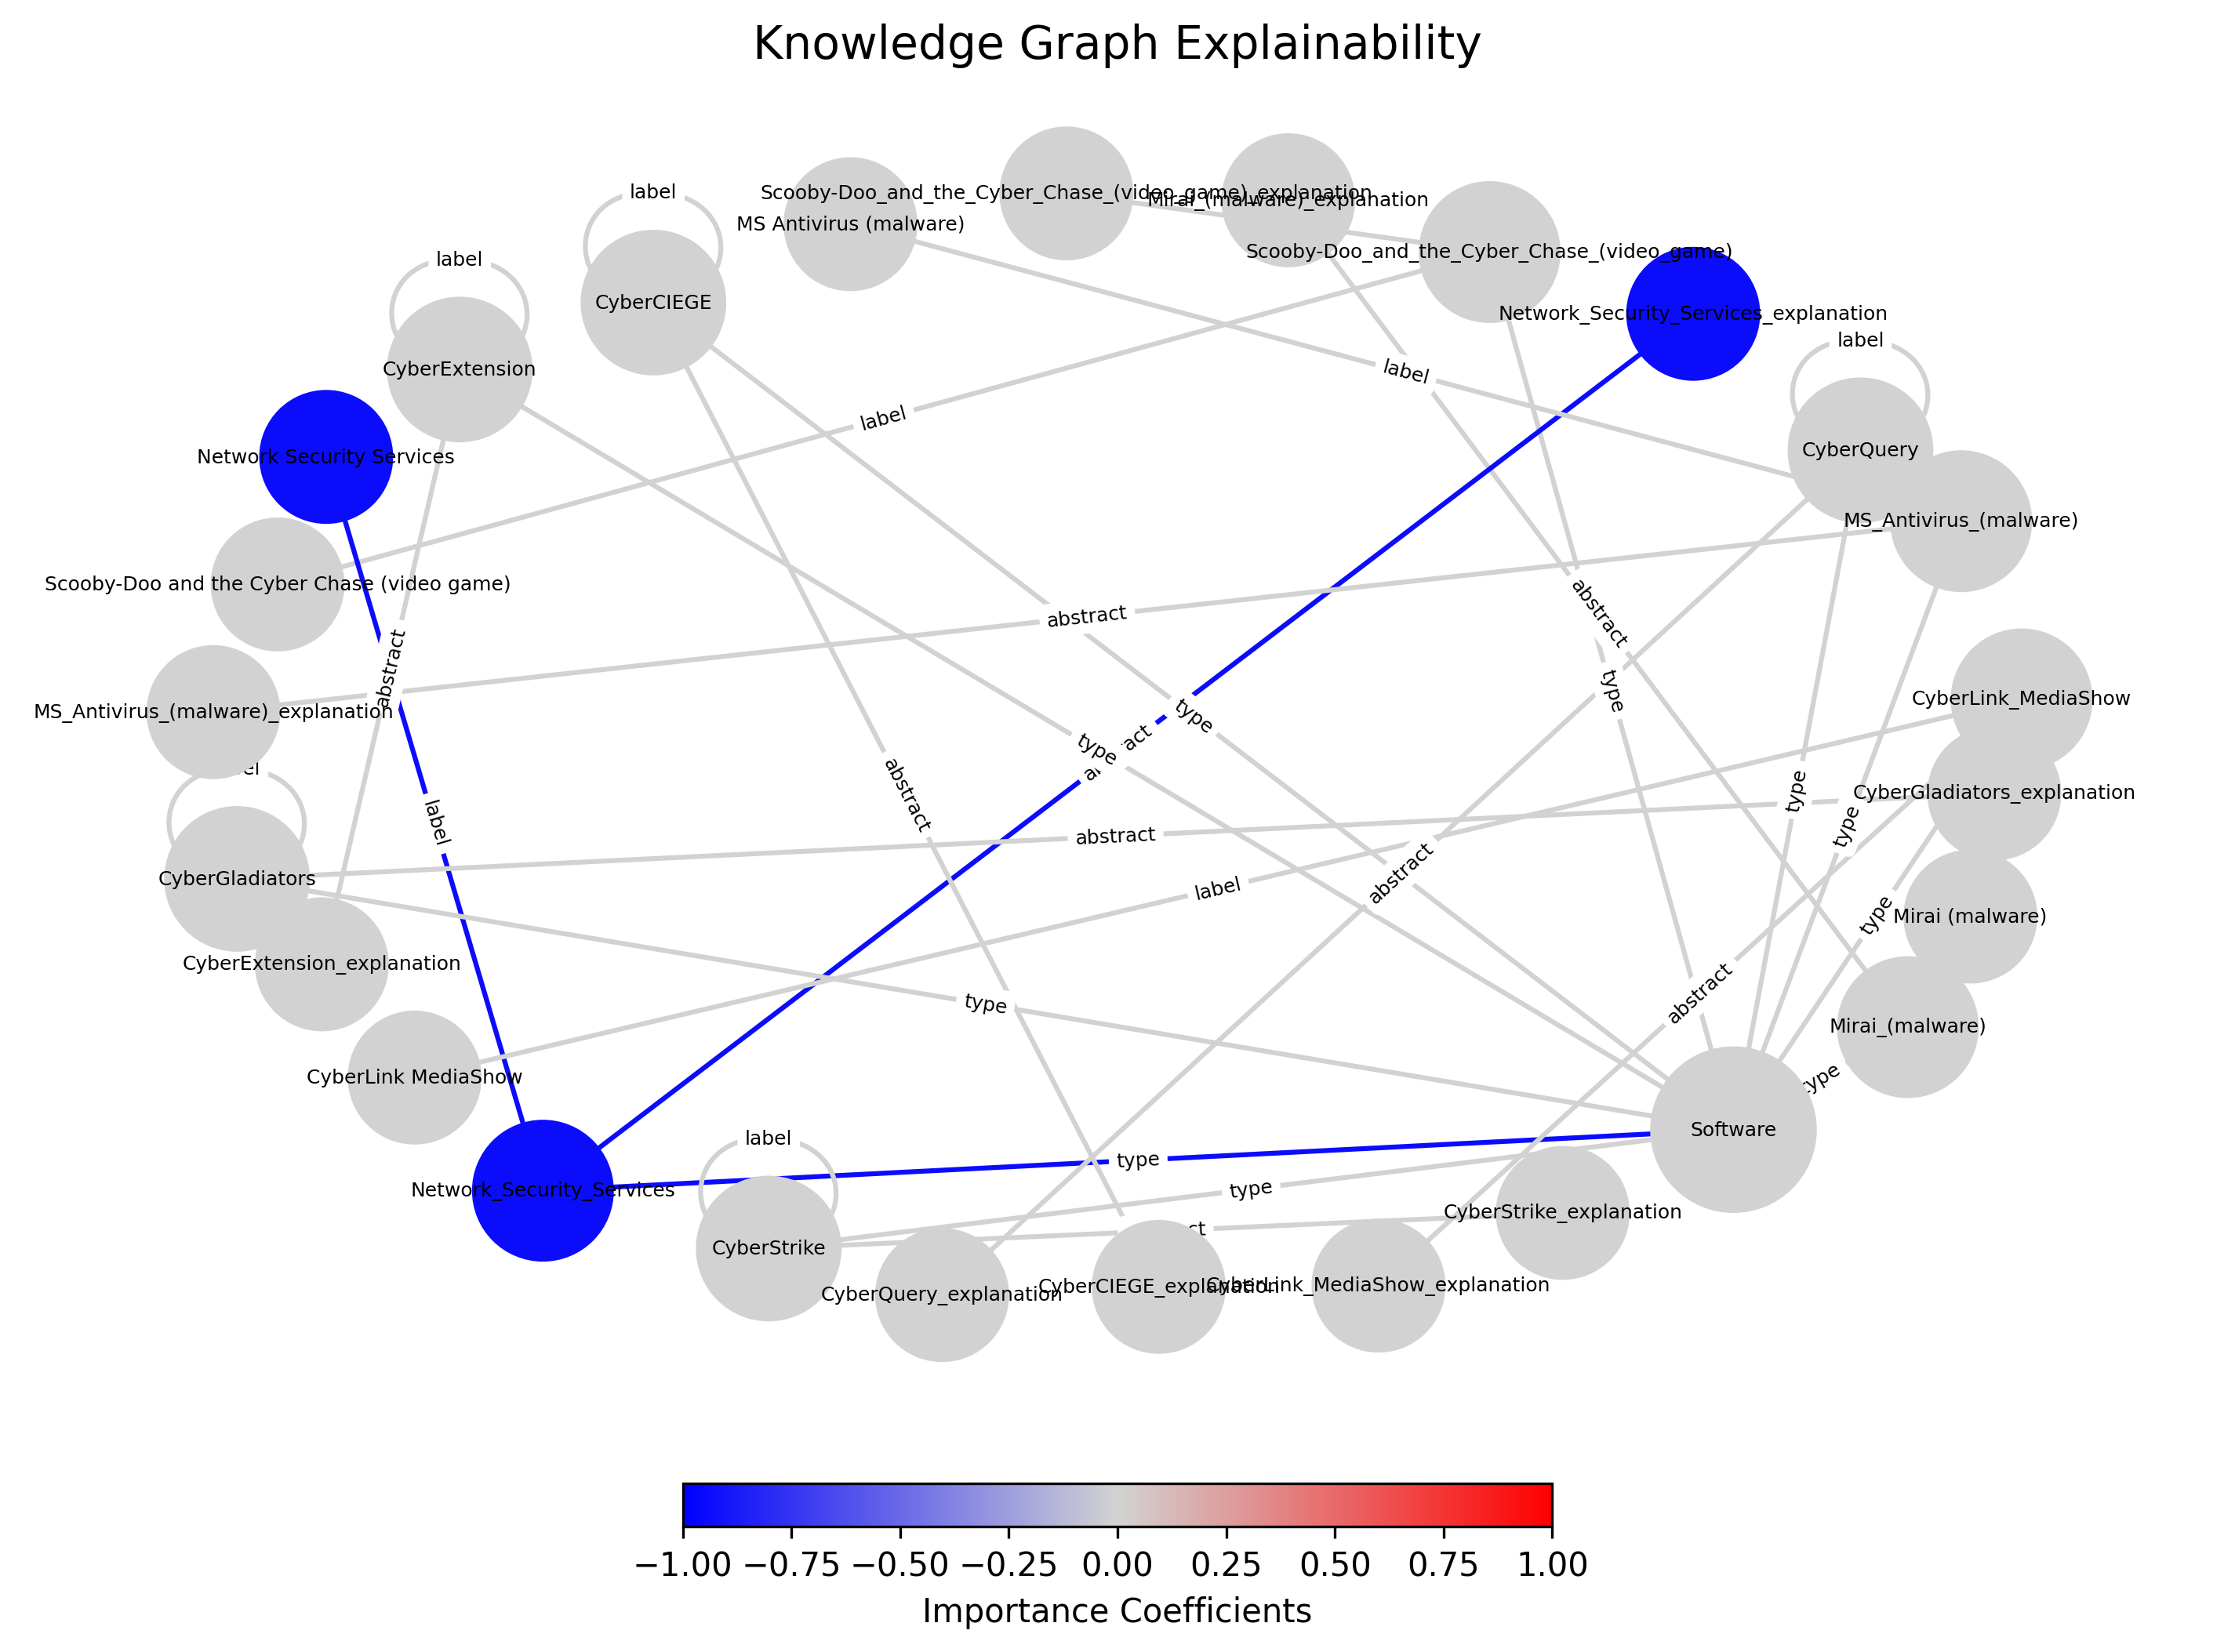

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 9.085745553071718e-06
R-squared (R²): 0.9999399694754768
Mean Absolute Error (MAE): 0.000871023219104582
Mean Loss (Lm): 0.0019136211852061047
Mean L1 Loss: 0.003832289401595057
Mean L2 Loss: 0.0001468091264826789
Weighted L1 Loss: 0.00036217929518375945
Weighted L2 Loss: 3.777934788022439e-06
Weighted R-squared (R²ω): 0.9999399694754768
Weighted Adjusted R-squared (Rˆ²ω): 0.9998732688926733
----------------------------------------------------------------------------------------------------


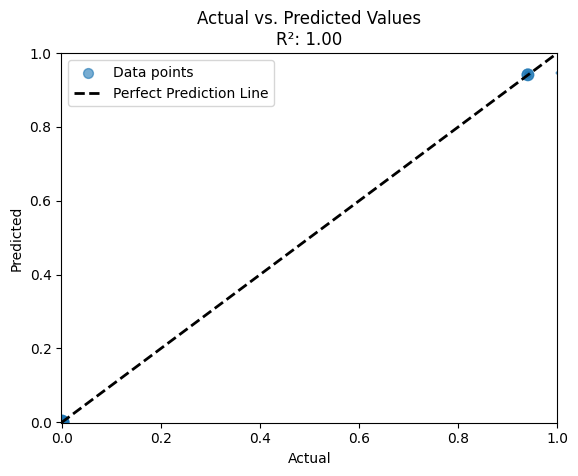

CPU times: user 23.46 s, sys 13.96 s, total 37.42 s
Wall time: 133.15 s


In [34]:
%%timed_and_log_detailed
similarities_wd = []
similarities_cosine = []
perturbations_vect2 = []
perturbation_texts = []  # Store the perturbation texts

# Loop for perturbations
for i in range(20):
    # Make a copy of the original vector for each iteration
    perturbation_vector = original.copy().flatten()

    # Randomly choose one or more parts to remove
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

    # Set the selected parts to 0 in the perturbation vector
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0

    # Append the perturbation vector to perturbations_vect2
    perturbations_vect2.append(perturbation_vector)

    # Perturb the KG by removing the selected parts
    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

    # Create a temporary graph for the perturbed KG
    graph_temp = NetworkxEntityGraph()
    for (node1, relation, node2) in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

    # Generate response using GraphQAChain
    chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
    temp_response = chain.run(question)

    # Store the perturbed response text
    perturbation_texts.append(temp_response)

    # Get embedding for the perturbed response
    temp_response_embedding = get_embedding(temp_response)


    # Calculate Wasserstein distance between the original and perturbed responses
    similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
    similarities_wd.append(similarity_wd)

    # Calculate cosine similarity between the original and perturbed responses
    similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
    similarities_cosine.append(similarity_cosine)

    print(f"Iteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {temp_response}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations_vect2 to a numpy array for pairwise distance calculation
perturbations_vect2 = np.array(perturbations_vect2)

# Calculate cosine distances between perturbation vectors and the original vector
distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

# Assuming you may use kernel width in further computations
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print all similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Optionally print all perturbation texts together for a consolidated view
print("\n--- Summary of Perturbations ---")
for i, text in enumerate(perturbation_texts):
    print(f"Perturbation {i + 1}: {text}")#bayLime_sum_inv_wd_cosine

min_value_wd= min(similarities_wd)
max_value_wd = max(similarities_wd)
# Scale between 0 and 1
Similarities_ = [(value - min_value_wd) / (max_value_wd - min_value_wd) for value in similarities_wd]
print(Similarities_)

simpler_model = LinearRegression()
simpler_model.fit(X=perturbations_vect2, y= Similarities_, sample_weight=weights)
coeff = simpler_model.coef_
# Call the function
plot_knowledge_graph_explainability(kg, part_indices, coeff)
y_true = np.array(Similarities_).ravel()
y_pred = simpler_model.predict(perturbations_vect2).ravel()

# Call the function
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
# Call the function
plot_actual_vs_predicted(y_true, y_pred, weights)

# BayLime: Fidelity Analysis of Text-to-Text using Wasserstein Distance and Graph-to-Graph using Cosine

Iteration 1
Parts removed: ['Part 1']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Wasserstein Distance with original answer: 0.0
Cosine Similarity with original answer: 1.0

Iteration 2
Parts removed: ['Part 10', 'Part 1', 'Part 8', 'Part 2', 'Part 4']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server a

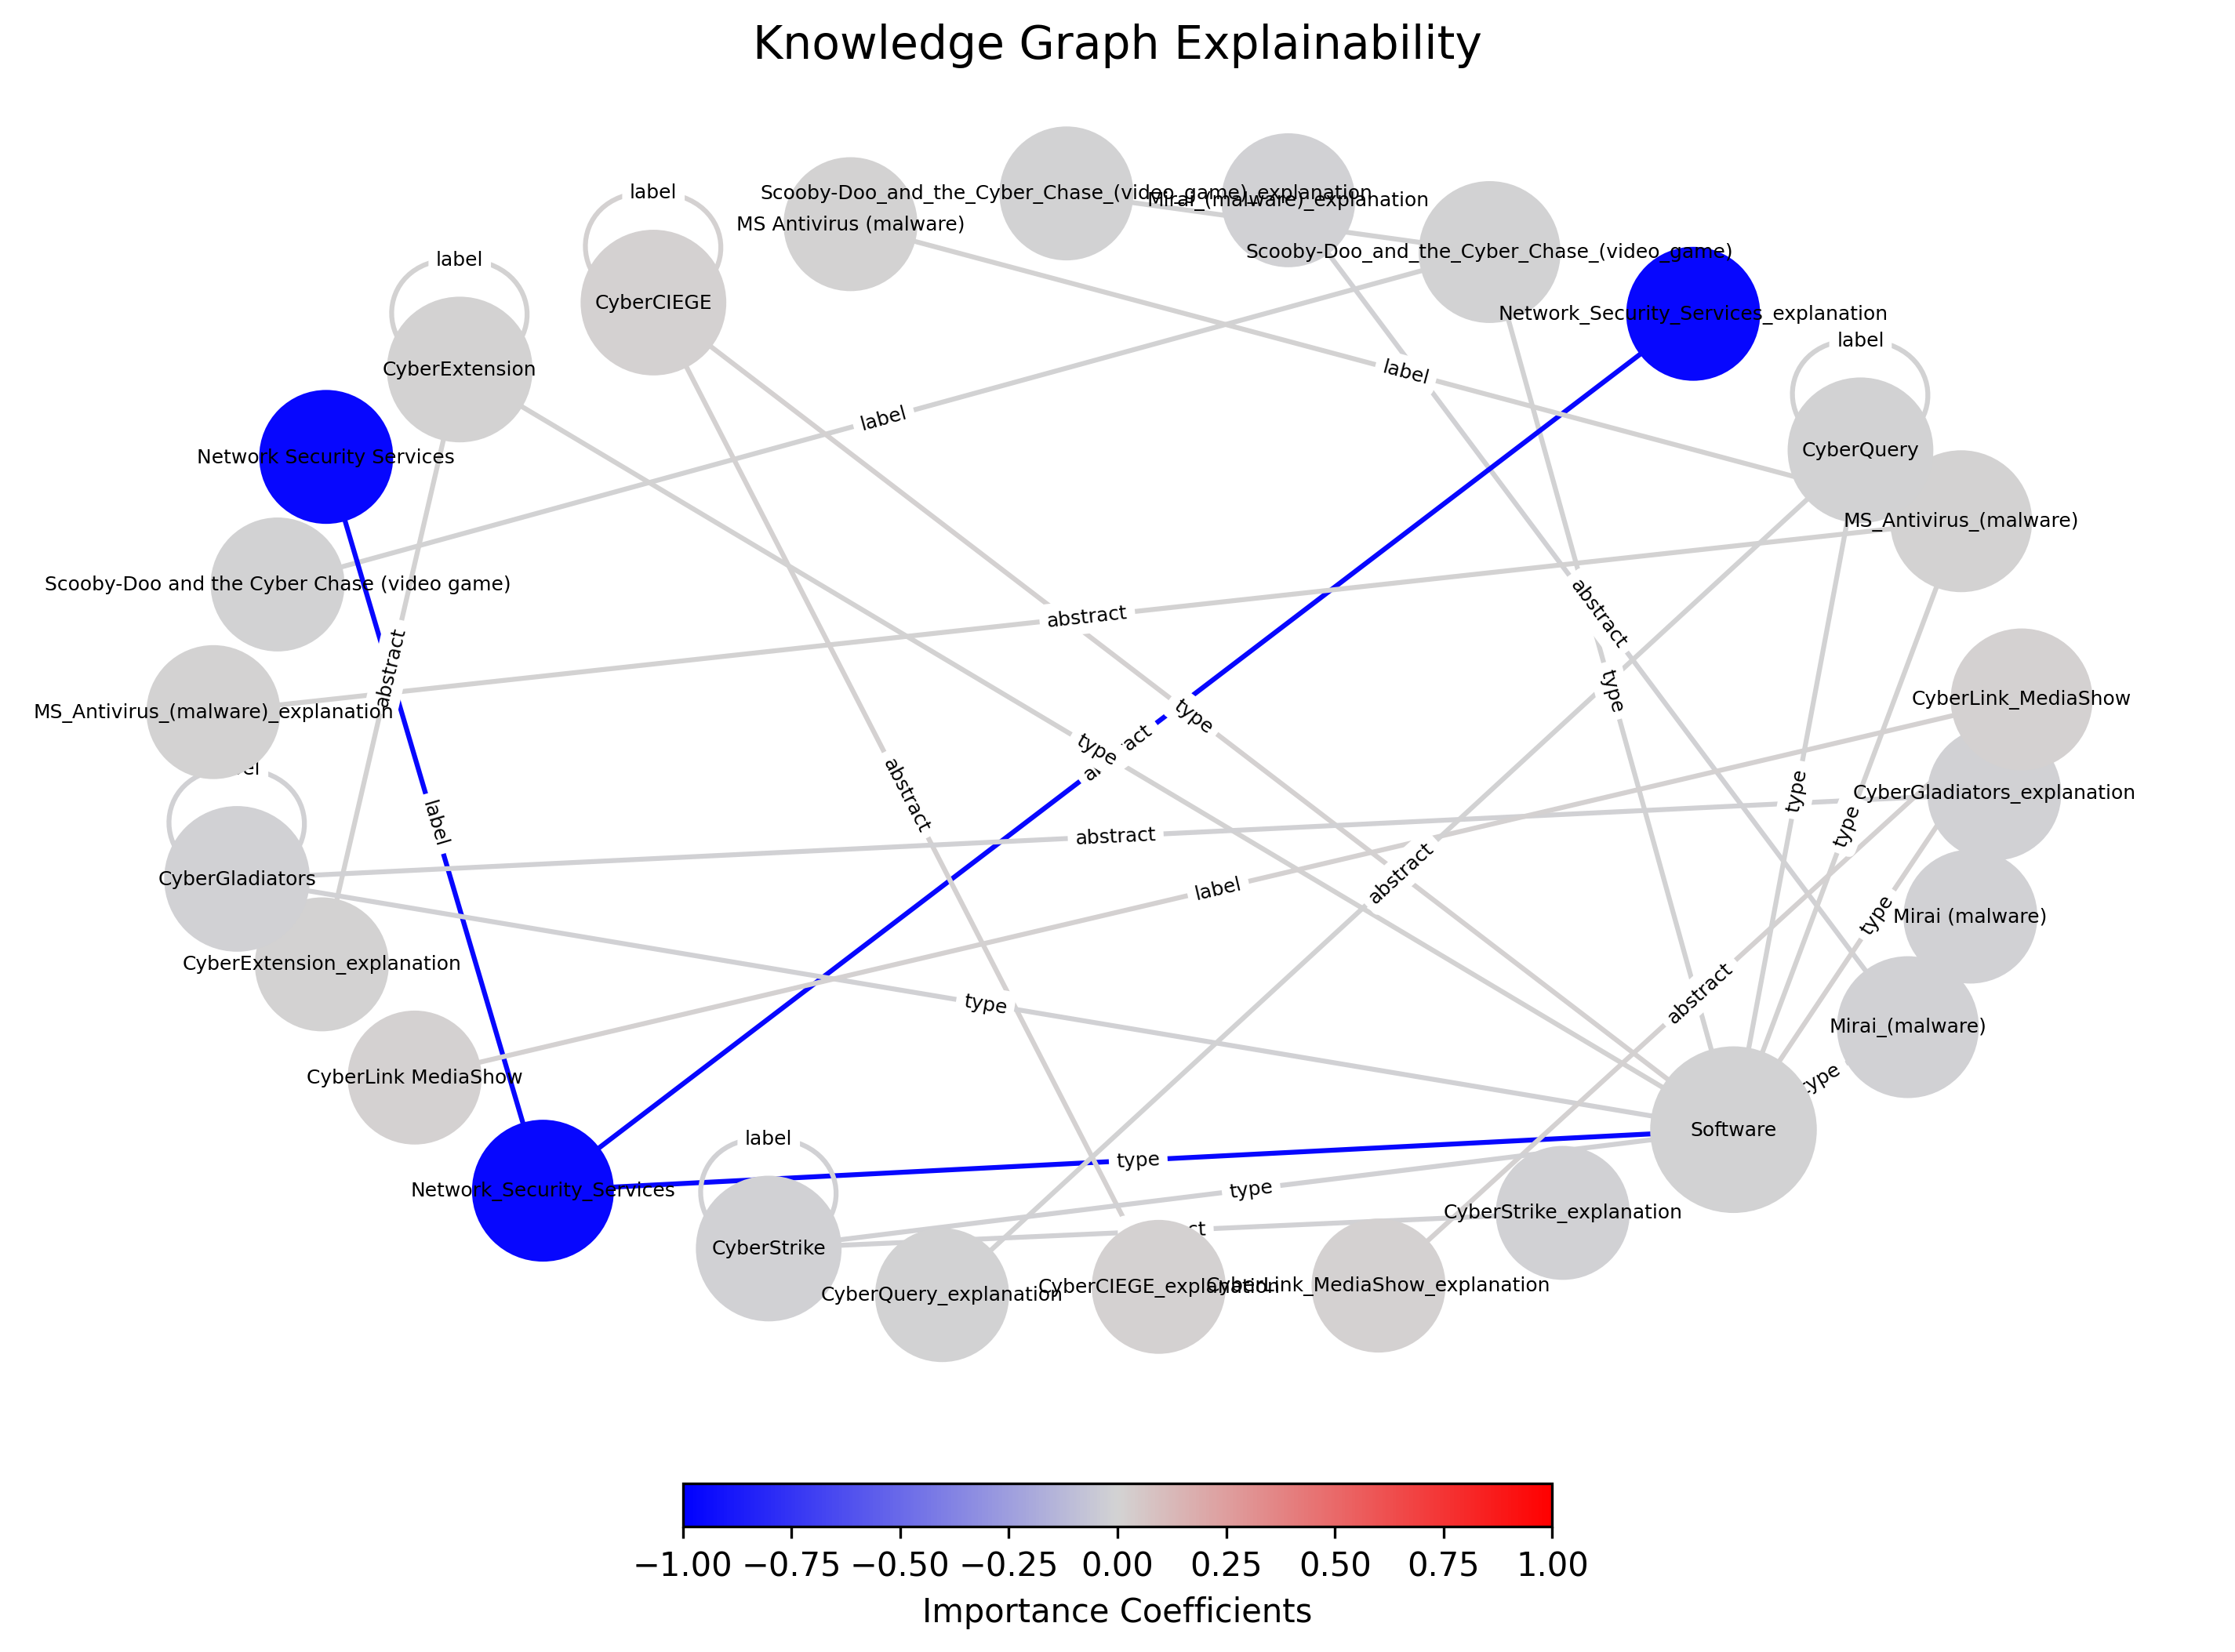

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 6.881650632963049e-05
R-squared (R²): 0.9994906298745203
Mean Absolute Error (MAE): 0.0051443278853743925
Mean Loss (Lm): 0.0017464296562402226
Mean L1 Loss: 0.009743705116138934
Mean L2 Loss: 0.00022247859581204658
Weighted L1 Loss: 0.003037851178120361
Weighted L2 Loss: 4.063782664824848e-05
Weighted R-squared (R²ω): 0.9994906298745203
Weighted Adjusted R-squared (Rˆ²ω): 0.9989246630684318
----------------------------------------------------------------------------------------------------


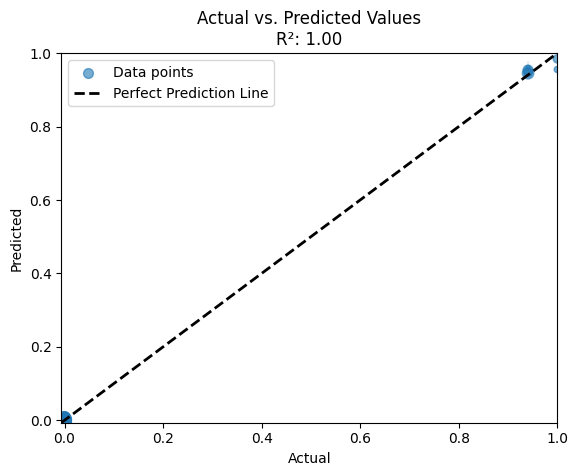

CPU times: user 25.52 s, sys 13.69 s, total 39.21 s
Wall time: 129.39 s


In [35]:
%%timed_and_log_detailed
similarities_wd = []
similarities_cosine = []
perturbations_vect2 = []
perturbation_texts = []  # Store the perturbation texts

# Loop for perturbations
for i in range(20):
    # Make a copy of the original vector for each iteration
    perturbation_vector = original.copy().flatten()

    # Randomly choose one or more parts to remove
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

    # Set the selected parts to 0 in the perturbation vector
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0

    # Append the perturbation vector to perturbations_vect2
    perturbations_vect2.append(perturbation_vector)

    # Perturb the KG by removing the selected parts
    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

    # Create a temporary graph for the perturbed KG
    graph_temp = NetworkxEntityGraph()
    for (node1, relation, node2) in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

    # Generate response using GraphQAChain
    chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
    temp_response = chain.run(question)

    # Store the perturbed response text
    perturbation_texts.append(temp_response)

    # Get embedding for the perturbed response
    temp_response_embedding = get_embedding(temp_response)


    # Calculate Wasserstein distance between the original and perturbed responses
    similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
    similarities_wd.append(similarity_wd)

    # Calculate cosine similarity between the original and perturbed responses
    similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
    similarities_cosine.append(similarity_cosine)

    print(f"Iteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {temp_response}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations_vect2 to a numpy array for pairwise distance calculation
perturbations_vect2 = np.array(perturbations_vect2)

# Calculate cosine distances between perturbation vectors and the original vector
distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

# Assuming you may use kernel width in further computations
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print all similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Optionally print all perturbation texts together for a consolidated view
print("\n--- Summary of Perturbations ---")
for i, text in enumerate(perturbation_texts):
    print(f"Perturbation {i + 1}: {text}")#bayLime_sum_inv_wd_cosine

min_value_wd= min(similarities_wd)
max_value_wd = max(similarities_wd)
# Scale between 0 and 1
Similarities_ = [(value - min_value_wd) / (max_value_wd - min_value_wd) for value in similarities_wd]
print(Similarities_)

simpler_model =  BayesianRidge()
simpler_model.fit(X=perturbations_vect2, y= Similarities_, sample_weight=weights)
coeff = simpler_model.coef_
# Call the function
plot_knowledge_graph_explainability(kg, part_indices, coeff)
y_true = np.array(Similarities_).ravel()
y_pred = simpler_model.predict(perturbations_vect2).ravel()

# Call the function
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
# Call the function
plot_actual_vs_predicted(y_true, y_pred, weights)

# BayLIME: Hybrid Text Metrics (Wasserstein Distance + Cosine) vs. Graph Metrics (Cosine) Fidelity Analysis.

Iteration 1
Parts removed: ['Part 9']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Wasserstein Distance with original answer: 0.0
Cosine Similarity with original answer: 1.0

Iteration 2
Parts removed: ['Part 3', 'Part 8', 'Part 9', 'Part 7', 'Part 6', 'Part 5', 'Part 1', 'Part 10', 'Part 2', 'Part 4']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network Security Services (NSS) is a set of open source libraries designed to support cross-platform development o

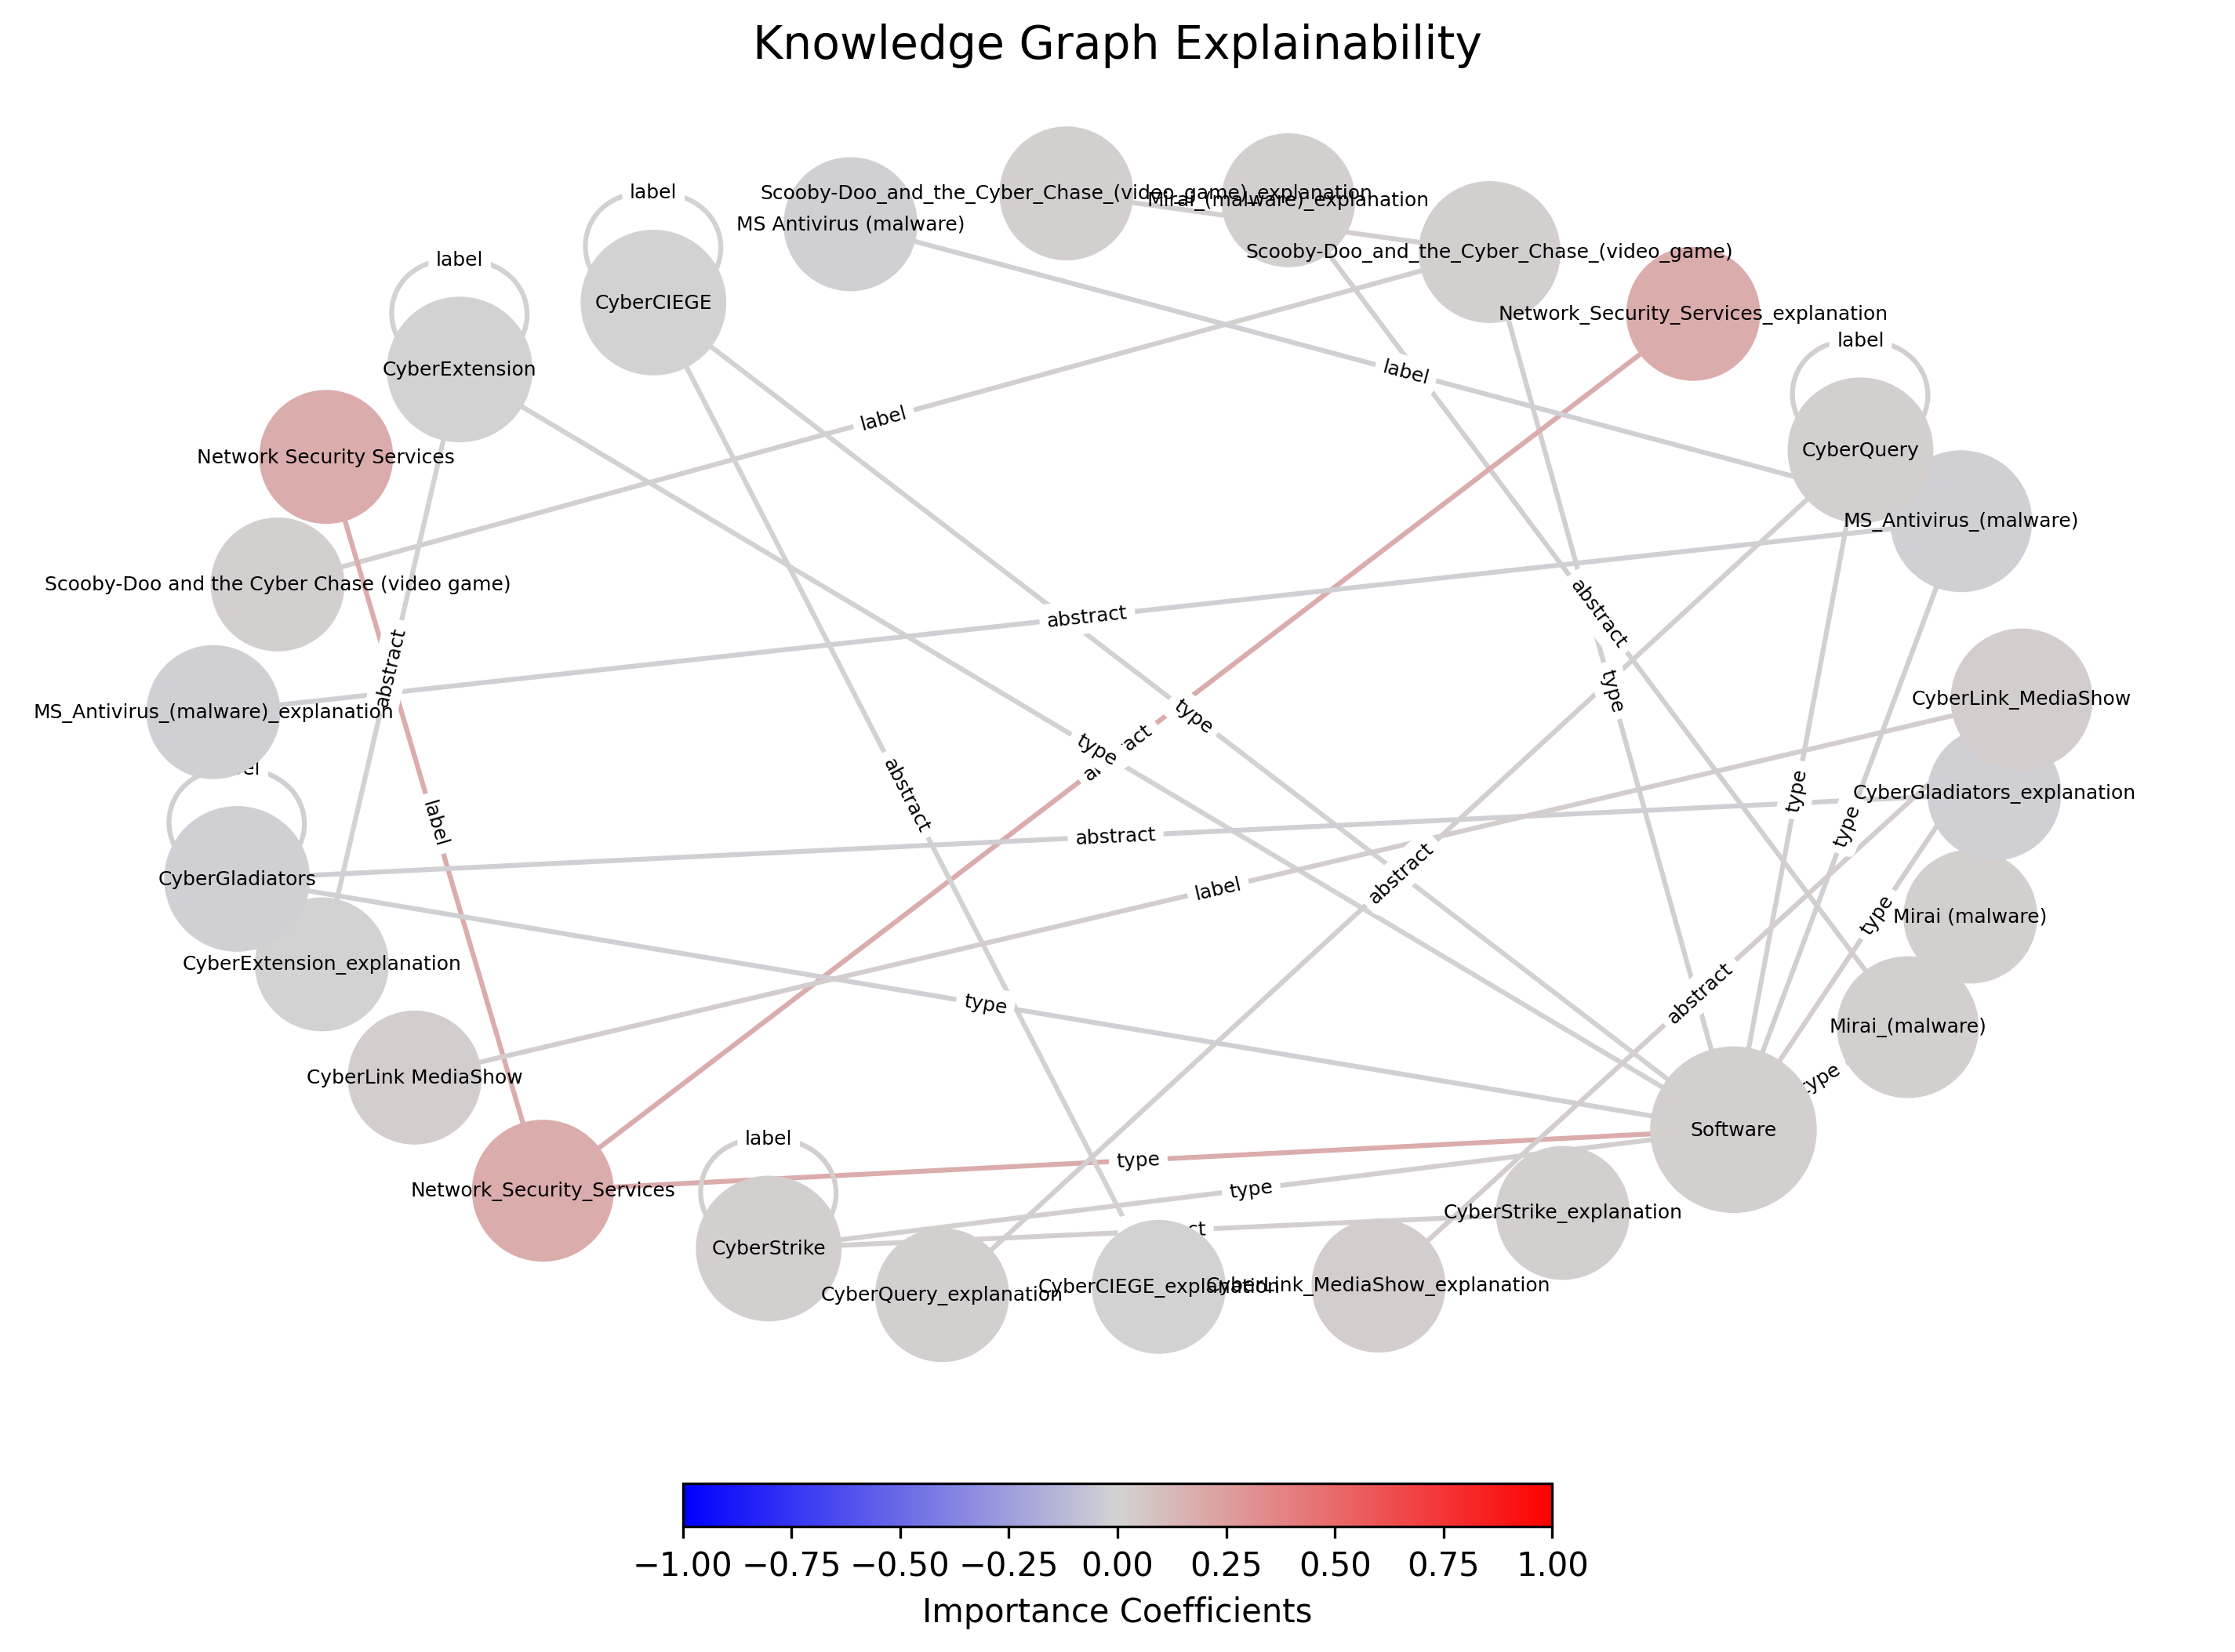

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 6.920755082934144e-05
R-squared (R²): 0.9905980219162542
Mean Absolute Error (MAE): 0.004930891009435794
Mean Loss (Lm): 0.00493996723173562
Mean L1 Loss: 0.016638460004148876
Mean L2 Loss: 0.000583516823348699
Weighted L1 Loss: 0.0020537409207375687
Weighted L2 Loss: 2.882529321582129e-05
Weighted R-squared (R²ω): 0.9905980219162542
Weighted Adjusted R-squared (Rˆ²ω): 0.9801513796009812
----------------------------------------------------------------------------------------------------


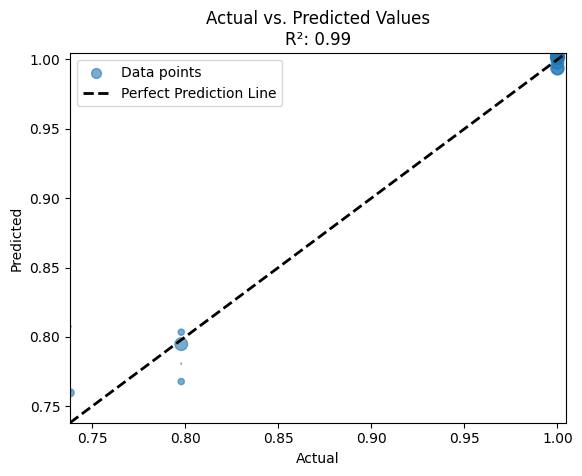

CPU times: user 22.89 s, sys 13.24 s, total 36.13 s
Wall time: 124.01 s


In [36]:
%%timed_and_log_detailed
similarities_wd = []
similarities_cosine = []
perturbations_vect2 = []
perturbation_texts = []  # Store the perturbation texts

# Loop for perturbations
for i in range(20):
    # Make a copy of the original vector for each iteration
    perturbation_vector = original.copy().flatten()

    # Randomly choose one or more parts to remove
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

    # Set the selected parts to 0 in the perturbation vector
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0

    # Append the perturbation vector to perturbations_vect2
    perturbations_vect2.append(perturbation_vector)

    # Perturb the KG by removing the selected parts
    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

    # Create a temporary graph for the perturbed KG
    graph_temp = NetworkxEntityGraph()
    for (node1, relation, node2) in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

    # Generate response using GraphQAChain
    chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
    temp_response = chain.run(question)

    # Store the perturbed response text
    perturbation_texts.append(temp_response)

    # Get embedding for the perturbed response
    temp_response_embedding = get_embedding(temp_response)


    # Calculate Wasserstein distance between the original and perturbed responses
    similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
    similarities_wd.append(similarity_wd)

    # Calculate cosine similarity between the original and perturbed responses
    similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
    similarities_cosine.append(similarity_cosine)

    print(f"Iteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {temp_response}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations_vect2 to a numpy array for pairwise distance calculation
perturbations_vect2 = np.array(perturbations_vect2)

# Calculate cosine distances between perturbation vectors and the original vector
distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

# Assuming you may use kernel width in further computations
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print all similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Optionally print all perturbation texts together for a consolidated view
print("\n--- Summary of Perturbations ---")
for i, text in enumerate(perturbation_texts):
    print(f"Perturbation {i + 1}: {text}")
# Combine the scaled inverse Wasserstein distances and cosine similarities
Similarities= [wd + cos for wd, cos in zip(similarities_wd, similarities_cosine)]
# Print the combined list of similarities
print(Similarities)
simpler_model = BayesianRidge()
simpler_model.fit(X=perturbations_vect2, y=Similarities, sample_weight=weights)
coeff = simpler_model.coef_
# Call the function
plot_knowledge_graph_explainability(kg, part_indices, coeff)
y_true = np.array(Similarities).ravel()
y_pred = simpler_model.predict(perturbations_vect2).ravel()

# Call the function
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
# Call the function
plot_actual_vs_predicted(y_true, y_pred, weights)

# Linear: Hybrid Text Metrics (Wasserstein Distance + Cosine) vs. Graph Metrics (Cosine) Fidelity Analysis.

Iteration 1
Parts removed: ['Part 2', 'Part 9', 'Part 8', 'Part 4', 'Part 7', 'Part 5', 'Part 1', 'Part 10', 'Part 3']
original_answer response:  Network_Security_Services is a collection of cryptographic computer libraries designed to support cross-platform development of security-enabled client and server applications.
Perturbed response:  Network Security Services (NSS) is a set of open source libraries designed to support cross-platform development of security-enabled client and server applications.

Knowledge Triplets:

1. Subject: Network Security Services
Predicate: is
Object: a set of open source libraries

2. Subject: NSS
Predicate: is designed to support
Object: cross-platform development of security-enabled client and server applications

3. Subject: Security-enabled client and server applications
Predicate: are
Object: supported by NSS
Wasserstein Distance with original answer: 0.0008141576723856103
Cosine Similarity with original answer: 0.7373949696600703

Iteration 2
Par

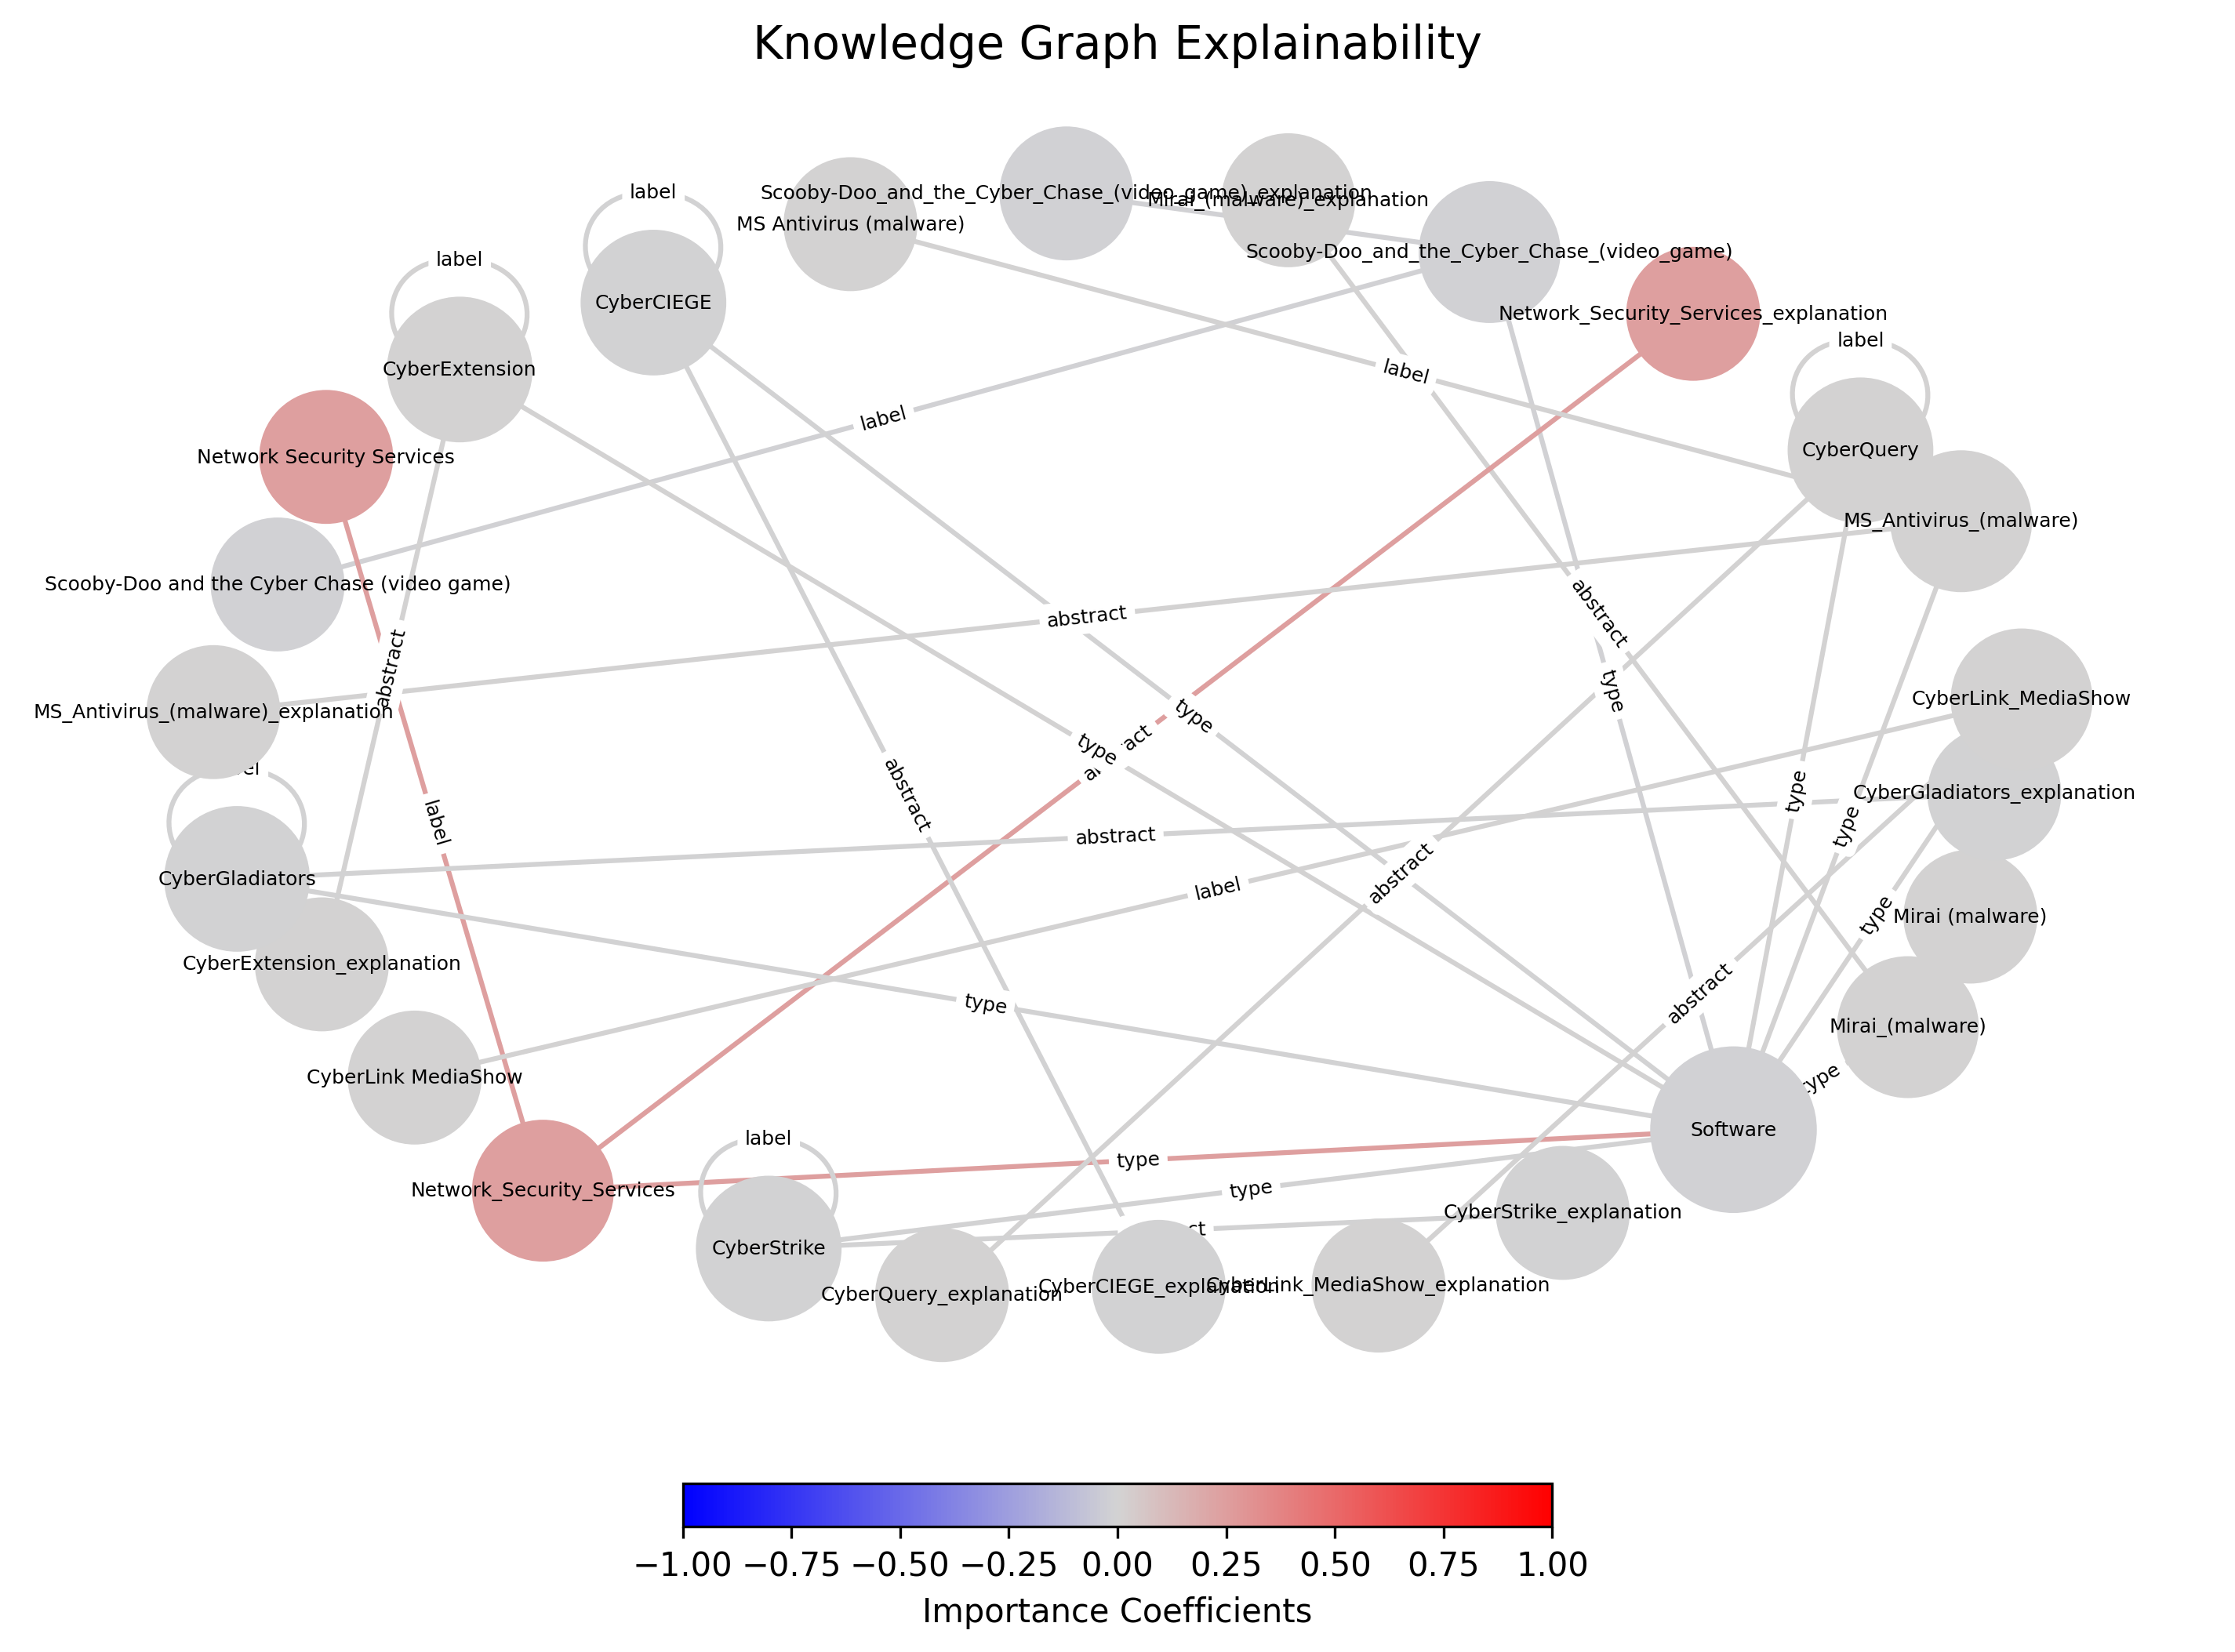

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 6.185362466951763e-05
R-squared (R²): 0.9916886898801094
Mean Absolute Error (MAE): 0.004539176869112803
Mean Loss (Lm): 0.001386689201038016
Mean L1 Loss: 0.008646476860698171
Mean L2 Loss: 0.00021200724980421763
Weighted L1 Loss: 0.0028972579843955454
Weighted L2 Loss: 3.9479824890055804e-05
Weighted R-squared (R²ω): 0.9916886898801094
Weighted Adjusted R-squared (Rˆ²ω): 0.9824539008580087
----------------------------------------------------------------------------------------------------


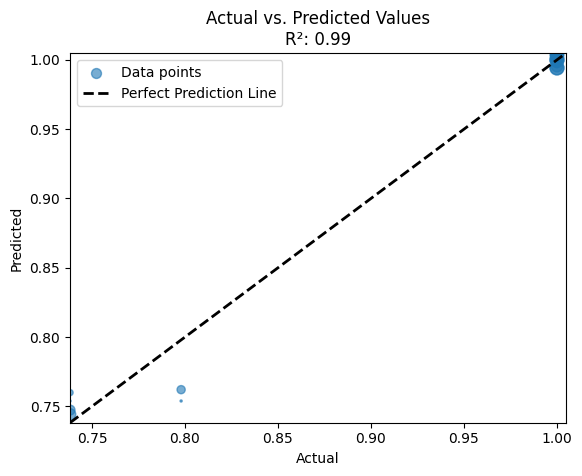

CPU times: user 24.88 s, sys 14.55 s, total 39.43 s
Wall time: 131.31 s


In [37]:
%%timed_and_log_detailed
similarities_wd = []
similarities_cosine = []
perturbations_vect2 = []
perturbation_texts = []  # Store the perturbation texts

# Loop for perturbations
for i in range(20):
    # Make a copy of the original vector for each iteration
    perturbation_vector = original.copy().flatten()

    # Randomly choose one or more parts to remove
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

    # Set the selected parts to 0 in the perturbation vector
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0

    # Append the perturbation vector to perturbations_vect2
    perturbations_vect2.append(perturbation_vector)

    # Perturb the KG by removing the selected parts
    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

    # Create a temporary graph for the perturbed KG
    graph_temp = NetworkxEntityGraph()
    for (node1, relation, node2) in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

    # Generate response using GraphQAChain
    chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
    temp_response = chain.run(question)

    # Store the perturbed response text
    perturbation_texts.append(temp_response)

    # Get embedding for the perturbed response
    temp_response_embedding = get_embedding(temp_response)


    # Calculate Wasserstein distance between the original and perturbed responses
    similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
    similarities_wd.append(similarity_wd)

    # Calculate cosine similarity between the original and perturbed responses
    similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
    similarities_cosine.append(similarity_cosine)

    print(f"Iteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {temp_response}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations_vect2 to a numpy array for pairwise distance calculation
perturbations_vect2 = np.array(perturbations_vect2)

# Calculate cosine distances between perturbation vectors and the original vector
distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

# Assuming you may use kernel width in further computations
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print all similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Optionally print all perturbation texts together for a consolidated view
print("\n--- Summary of Perturbations ---")
for i, text in enumerate(perturbation_texts):
    print(f"Perturbation {i + 1}: {text}")
# Combine the scaled inverse Wasserstein distances and cosine similarities
Similarities= [wd + cos for wd, cos in zip(similarities_wd, similarities_cosine)]
# Print the combined list of similarities
print(Similarities)
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations_vect2, y=Similarities, sample_weight=weights)
coeff = simpler_model.coef_
# Call the function
plot_knowledge_graph_explainability(kg, part_indices, coeff)
y_true = np.array(Similarities).ravel()
y_pred = simpler_model.predict(perturbations_vect2).ravel()

# Call the function
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
# Call the function
plot_actual_vs_predicted(y_true, y_pred, weights)

# Time Complexity

In [38]:
# Define metric names corresponding to each run
metric_names = ["BayLIME: Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine",
                "BayLIME: Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity",
                "BayLIME: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine",
                "Linear : Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity",
                "Linear: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine",
                "Linear : Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine",
                "Linear: Fidelity Analysis of Text-to-Text using Wasserstein Distance and Graph-to-Graph using Cosine",
                "BayLime: Fidelity Analysis of Text-to-Text using Wasserstein Distance and Graph-to-Graph using Cosine",
                "BayLIME: Hybrid Text Metrics (Wasserstein Distance + Cosine) vs. Graph Metrics (Cosine) Fidelity Analysis",
                "Linear: Hybrid Text Metrics (Wasserstein Distance + Cosine) vs. Graph Metrics (Cosine) Fidelity Analysis"
                ]

# Print all logged runtimes with metric names
for i, (runtime, metric) in enumerate(zip(runtimes, metric_names), start=1):
    print(f"Metric: {metric}")
    print(f"  CPU times: user {runtime['user_time']:.2f} s, sys {runtime['sys_time']:.2f} s, total {runtime['total_cpu_time']:.2f} s")
    print(f"  Wall time: {runtime['wall_time']:.2f} s")



Metric: BayLIME: Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine
  CPU times: user 27.10 s, sys 15.37 s, total 42.47 s
  Wall time: 129.65 s
Metric: BayLIME: Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity
  CPU times: user 25.05 s, sys 13.20 s, total 38.25 s
  Wall time: 124.45 s
Metric: BayLIME: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine
  CPU times: user 54.39 s, sys 15.47 s, total 69.86 s
  Wall time: 133.79 s
Metric: Linear : Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity
  CPU times: user 33.26 s, sys 13.55 s, total 46.81 s
  Wall time: 126.52 s
Metric: Linear: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine
  CPU times: user 27.46 s, sys 15.58 s, total 43.04 s
  Wall time: 144.66 s
Metric: Linear : Dual Metrics: Blending Inverse W

Here is the order of the metrics sorted from the shortest to the longest wall time:

1.  Metric: Linear: Hybrid Text Metrics (Wasserstein Distance + Cosine) vs. Graph Metrics (Cosine) Fidelity Analysis
    CPU times: user 22.89 s, sys 13.24 s, total 36.13 s
    Wall time: 124.01 s

2.  Metric: BayLIME: Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity
    CPU times: user 25.05 s, sys 13.20 s, total 38.25 s
    Wall time: 124.45 s

3.  Metric: Linear : Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine
    CPU times: user 22.84 s, sys 13.19 s, total 36.03 s
    Wall time: 124.96 s

4.  Metric: Linear : Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity
    CPU times: user 33.26 s, sys 13.55 s, total 46.81 s
    Wall time: 126.52 s

5.  Metric: BayLIME: Hybrid Text Metrics (Wasserstein Distance + Cosine) vs. Graph Metrics (Cosine) Fidelity Analysis
    CPU times: user 25.52 s, sys 13.69 s, total 39.21 s
    Wall time: 129.39 s

6.  Metric: BayLIME: Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine
    CPU times: user 27.10 s, sys 15.37 s, total 42.47 s
    Wall time: 129.65 s

7.  Metric: BayLIME: Fidelity Analysis of Text-to-Text using Wasserstein Distance and Graph-to-Graph using Cosine
    CPU times: user 23.46 s, sys 13.96 s, total 37.42 s
    Wall time: 133.15 s

8.  Metric: BayLIME: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine
    CPU times: user 54.39 s, sys 15.47 s, total 69.86 s
    Wall time: 133.79 s

9.  Metric: Linear: Fidelity Analysis of Text-to-Text using Wasserstein Distance and Graph-to-Graph using Cosine
    CPU times: user 33.38 s, sys 15.81 s, total 49.19 s
    Wall time: 137.23 s

10. Metric: Linear: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine
    CPU times: user 27.46 s, sys 15.58 s, total 43.04 s
    Wall time: 144.66 s



As we know Best Choice: Linear: Fidelity Analysis of Text-to-Text using Inv_WD & Graph-to-Graph using Cosine
    It has the lowest MSE (1.718e-10) and the highest R² (0.9999999992971819). which is in second place